In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #For EDA purpose
%matplotlib inline   
import seaborn as sns  #EDA purpose
import warnings  #bypass Warning
warnings.filterwarnings('ignore')
import random
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
df = pd.read_csv("HOUSE_TRAIN.csv")
pd.set_option('display.max_columns', None)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [3]:
df1 = pd.read_csv("HOUSE_TEST.csv")
pd.set_option('display.max_columns', None)
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [5]:
df.drop(['PoolQC','MiscFeature','Alley','Id'], axis = 1,inplace = True)
df1.drop(['PoolQC','MiscFeature','Alley','Id'], axis = 1,inplace = True)


In [6]:
df.shape

(1168, 77)

In [7]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,NaN,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,0,2,2007,WD,Normal,128000
1,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,0,10,2007,WD,Normal,268000
2,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,0,6,2007,WD,Normal,269790
3,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,MnPrv,0,1,2010,COD,Normal,190000
4,20,RL,NaN,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,0,6,2009,WD,Normal,215000


In [8]:
df.rename(columns = {'MSSubClass':'Dwelling'}, inplace = True)
df1.rename(columns = {'MSSubClass':'Dwelling'}, inplace = True)
df.rename(columns = {'MSZoning':'Zone','LotFrontage':'Lotfrontage','LotArea': 'SQFT','LandContour':'Flatness'}, inplace = True)
df1.rename(columns = {'MSZoning':'Zone','LotFrontage':'Lotfrontage','LotArea': 'SQFT','LandContour':'Flatness'}, inplace = True)

In [9]:
df

,Dwelling,Zone,Lotfrontage,SQFT,Street,LotShape,Flatness,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,NaN,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,0,2,2007,WD,Normal,128000
1,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,0,10,2007,WD,Normal,268000
2,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,0,6,2007,WD,Normal,269790
3,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,MnPrv,0,1,2010,COD,Normal,190000
4,20,RL,NaN,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,RL,NaN,9819,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,MnPrv,0,2,2010,WD,Normal,122000
1164,20,RL,67.0,8777,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,MnPrv,0,5,2009,WD,Normal,108000
1165,160,RL,24.0,2280,Pave,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,NaN,0,7,2009,WD,Normal,148500
1166,70,C (all),50.0,8500,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,MnPrv,0,7,2008,WD,Normal,40000


In [10]:
categorical_df=[j for j in df if df[j].dtype == 'object']
categorical_df1 =[k for k in df1 if df1[k].dtype == 'object']

In [11]:
for i in categorical_df:
    columns = df[i].unique()
    print(i,columns)

Zone ['RL' 'RM' 'FV' 'RH' 'C (all)']
Street ['Pave' 'Grvl']
LotShape ['IR1' 'Reg' 'IR2' 'IR3']
Flatness ['Lvl' 'Bnk' 'HLS' 'Low']
Utilities ['AllPub']
LotConfig ['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDale' 'StoneBr' 'BrkSide'
 'NridgHt' 'OldTown' 'Somerst' 'Timber' 'SWISU' 'SawyerW' 'ClearCr'
 'Veenker' 'Blmngtn' 'MeadowV' 'Blueste']
Condition1 ['Norm' 'Feedr' 'RRAn' 'PosA' 'RRAe' 'Artery' 'PosN' 'RRNe' 'RRNn']
Condition2 ['Norm' 'RRAe' 'Feedr' 'PosN' 'Artery' 'RRNn' 'PosA' 'RRAn']
BldgType ['TwnhsE' '1Fam' 'Duplex' 'Twnhs' '2fmCon']
HouseStyle ['1Story' '2Story' '1.5Fin' 'SFoyer' '1.5Unf' 'SLvl' '2.5Fin' '2.5Unf']
RoofStyle ['Gable' 'Flat' 'Hip' 'Shed' 'Gambrel' 'Mansard']
RoofMatl ['CompShg' 'Tar&Grv' 'WdShngl' 'WdShake' 'Roll' 'ClyTile' 'Metal'
 'Membran']
Exterior1st ['Plywood' 'Wd Sdng' 'MetalSd' 'CemntBd' 'VinylSd' 'HdBoard' '

In [12]:
for col in categorical_df1:
    columns2 = df1[col].unique()
    print(i,columns2)

SaleCondition ['RL' 'RM' 'FV' 'C (all)']
SaleCondition ['Pave' 'Grvl']
SaleCondition ['IR1' 'Reg' 'IR3' 'IR2']
SaleCondition ['HLS' 'Lvl' 'Bnk' 'Low']
SaleCondition ['AllPub' 'NoSeWa']
SaleCondition ['Corner' 'CulDSac' 'Inside' 'FR2' 'FR3']
SaleCondition ['Gtl' 'Mod' 'Sev']
SaleCondition ['StoneBr' 'CollgCr' 'Crawfor' 'Somerst' 'MeadowV' 'Edwards' 'NridgHt'
 'SawyerW' 'Mitchel' 'BrkSide' 'NAmes' 'Timber' 'OldTown' 'Sawyer'
 'IDOTRR' 'SWISU' 'Gilbert' 'NWAmes' 'BrDale' 'NPkVill' 'NoRidge'
 'Blmngtn' 'Veenker' 'ClearCr']
SaleCondition ['Norm' 'Feedr' 'Artery' 'RRAe' 'RRNn' 'PosN' 'RRAn' 'PosA']
SaleCondition ['Norm' 'RRNn']
SaleCondition ['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']
SaleCondition ['1Story' '2Story' 'SFoyer' 'SLvl' '1.5Fin' '1.5Unf' '2.5Fin' '2.5Unf']
SaleCondition ['Hip' 'Gable' 'Gambrel' 'Mansard' 'Flat']
SaleCondition ['CompShg' 'WdShake' 'Tar&Grv']
SaleCondition ['VinylSd' 'HdBoard' 'MetalSd' 'CemntBd' 'Wd Sdng' 'Plywood' 'BrkFace'
 'AsbShng' 'WdShing' 'BrkComm' 'Stucco

In [13]:
df.isnull().sum()

Dwelling           0
Zone               0
Lotfrontage      214
SQFT               0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 77, dtype: int64

In [14]:
df['Lotfrontage'].fillna((df['Lotfrontage'].mean()), inplace=True)
df1['Lotfrontage'].fillna((df1['Lotfrontage'].mean()), inplace=True)

In [15]:
nan_values = df.isna()
nan_columns = nan_values.any()

columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence']


In [16]:
df

,Dwelling,Zone,Lotfrontage,SQFT,Street,LotShape,Flatness,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,70.98847,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,0,2,2007,WD,Normal,128000
1,20,RL,95.00000,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,0,10,2007,WD,Normal,268000
2,60,RL,92.00000,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,0,6,2007,WD,Normal,269790
3,20,RL,105.00000,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,MnPrv,0,1,2010,COD,Normal,190000
4,20,RL,70.98847,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,RL,70.98847,9819,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,MnPrv,0,2,2010,WD,Normal,122000
1164,20,RL,67.00000,8777,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,MnPrv,0,5,2009,WD,Normal,108000
1165,160,RL,24.00000,2280,Pave,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,NaN,0,7,2009,WD,Normal,148500
1166,70,C (all),50.00000,8500,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,MnPrv,0,7,2008,WD,Normal,40000


In [17]:
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df1['BsmtQual'] = df1['BsmtQual'].fillna(df1['BsmtQual'].mode()[0])

In [18]:
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df1['BsmtCond'] = df1['BsmtCond'].fillna(df1['BsmtCond'].mode()[0])
df1['BsmtExposure'] = df1['BsmtExposure'].fillna(df1['BsmtExposure'].mode()[0])
df1['BsmtFinType1'] = df1['BsmtFinType1'].fillna(df1['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df1['BsmtFinType2'] = df1['BsmtFinType2'].fillna(df1['BsmtFinType2'].mode()[0])
df1['FireplaceQu'] = df1['FireplaceQu'].fillna(df1['FireplaceQu'].mode()[0])
df1['GarageType'] = df1['GarageType'].fillna(df1['GarageType'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageType'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['Fence'] = df['Fence'].fillna(df['Fence'].mode()[0])
df1['GarageFinish'] = df1['GarageFinish'].fillna(df1['GarageType'].mode()[0])
df1['GarageQual'] = df1['GarageQual'].fillna(df1['GarageQual'].mode()[0])
df1['GarageCond'] = df1['GarageCond'].fillna(df1['GarageCond'].mode()[0])
df1['Fence'] = df1['Fence'].fillna(df1['Fence'].mode()[0])

In [19]:
df['MasVnrType'].unique()
df1['MasVnrType'] = df1['MasVnrType'].fillna(df1['MasVnrType'].mode()[0])

In [20]:
df['GarageYrBlt'].fillna(value=df['GarageYrBlt'].mean(), inplace=True)
df1['GarageYrBlt'].fillna(value=df1['GarageYrBlt'].mean(), inplace=True)

In [21]:
nan_values = df.isna()
nan_columns = nan_values.any()

nan_values1 = df1.isna()
nan_columns1 = nan_values1.any()

columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

columns_with_nan1 = df1.columns[nan_columns1].tolist()
print(columns_with_nan1)

['MasVnrType', 'MasVnrArea']
['MasVnrArea', 'Electrical']


In [22]:
df['MasVnrArea'].fillna(value=df['MasVnrArea'].mean(), inplace=True)
df1['MasVnrArea'].fillna(value=df1['MasVnrArea'].mean(), inplace=True)

In [23]:
df1['Electrical'] = df1['Electrical'].fillna(df1['Electrical'].mode()[0])


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Dwelling       1168 non-null   int64  
 1   Zone           1168 non-null   object 
 2   Lotfrontage    1168 non-null   float64
 3   SQFT           1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   Flatness       1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

In [25]:
df['Dwelling'].apply(str)
df1['Dwelling'].apply(str)


0       20
1      120
2       20
3       70
4       60
      ... 
287     20
288     20
289     20
290     50
291    160
Name: Dwelling, Length: 292, dtype: object

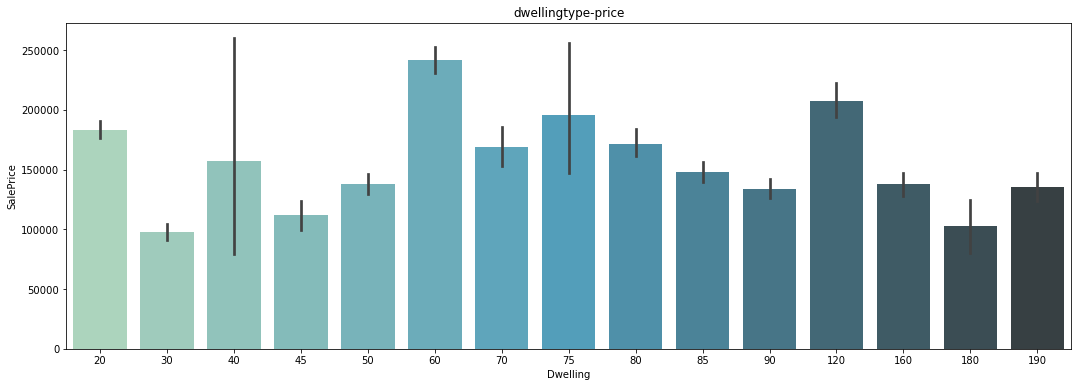

In [26]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'Dwelling', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('dwellingtype-price')
plt.xticks
plt.show()

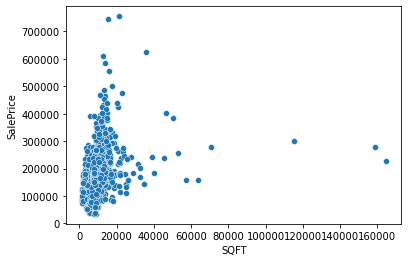

In [27]:
sns.scatterplot(x='SQFT',y='SalePrice',data=df)

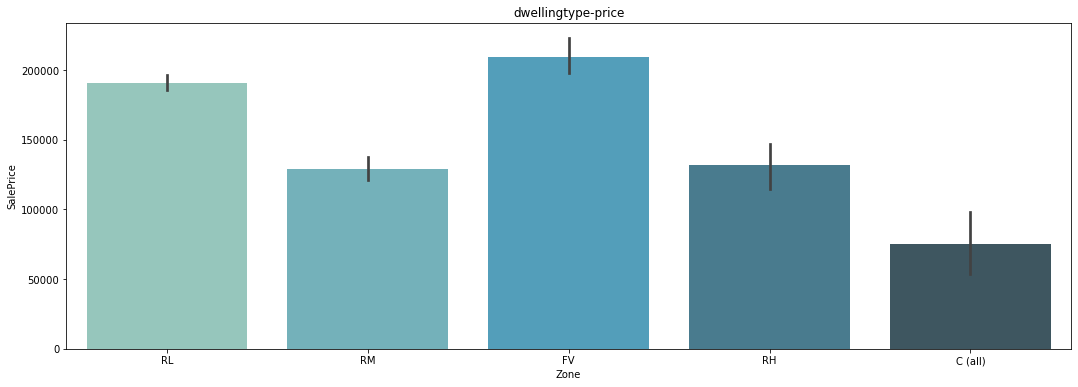

In [28]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'Zone', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('dwellingtype-price')
plt.xticks
plt.show()

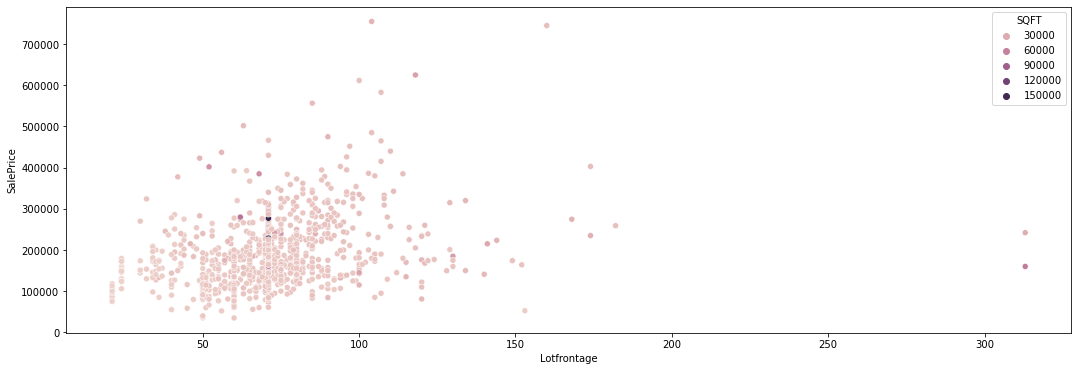

In [29]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='Lotfrontage',y='SalePrice',hue = 'SQFT',data=df)

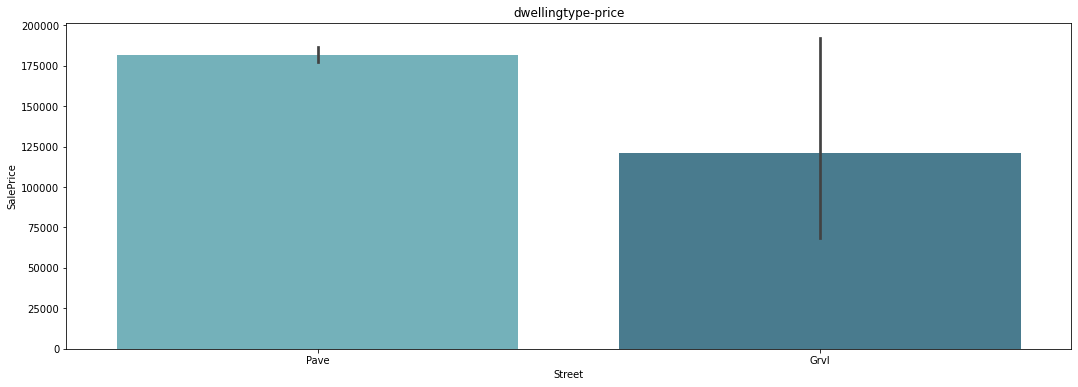

In [30]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'Street', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('dwellingtype-price')
plt.xticks
plt.show()

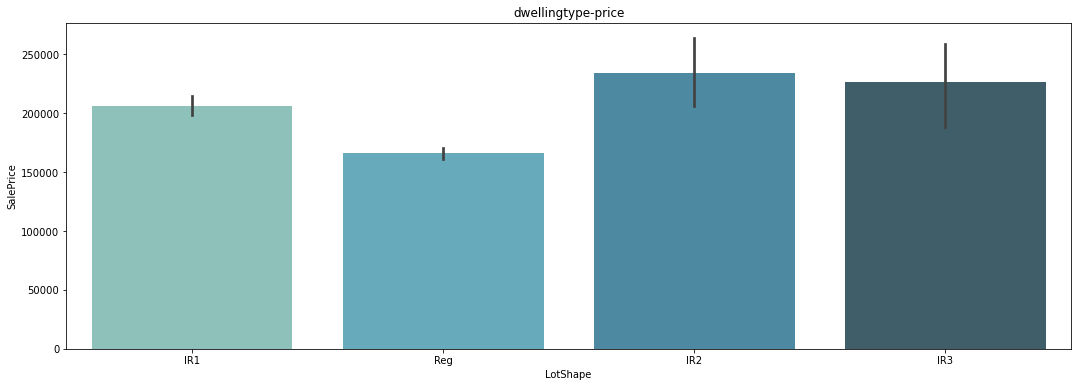

In [31]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'LotShape', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('dwellingtype-price')
plt.xticks
plt.show()

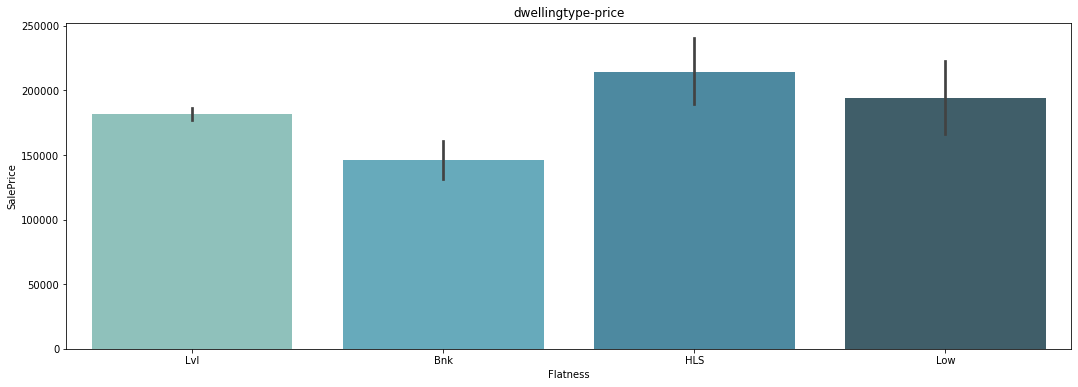

In [32]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'Flatness', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('dwellingtype-price')
plt.xticks
plt.show()

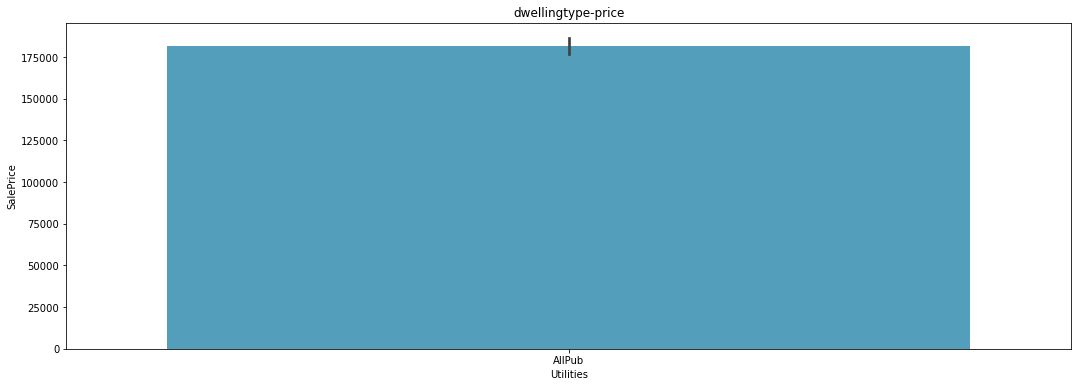

In [33]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'Utilities', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('dwellingtype-price')
plt.xticks
plt.show()

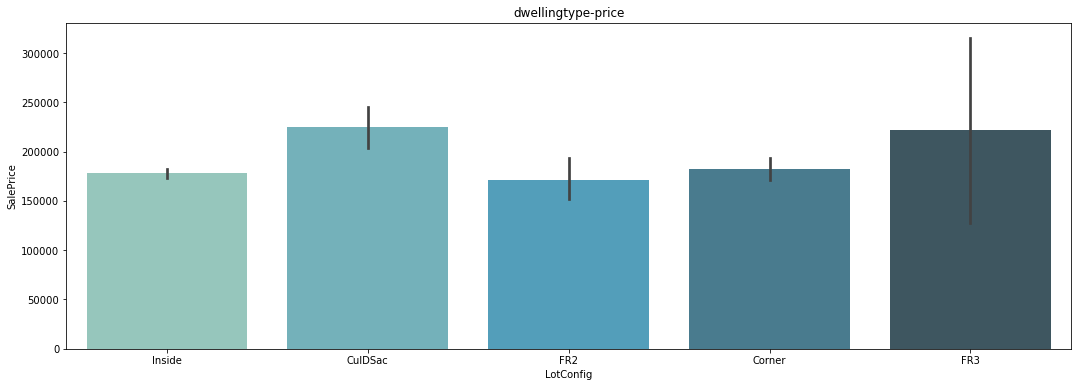

In [34]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'LotConfig', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('dwellingtype-price')
plt.xticks
plt.show()

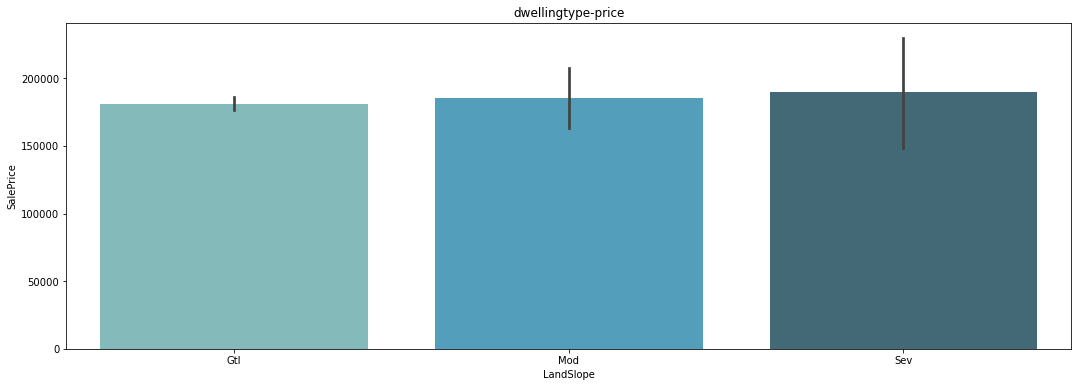

In [35]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'LandSlope', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('dwellingtype-price')
plt.xticks
plt.show()

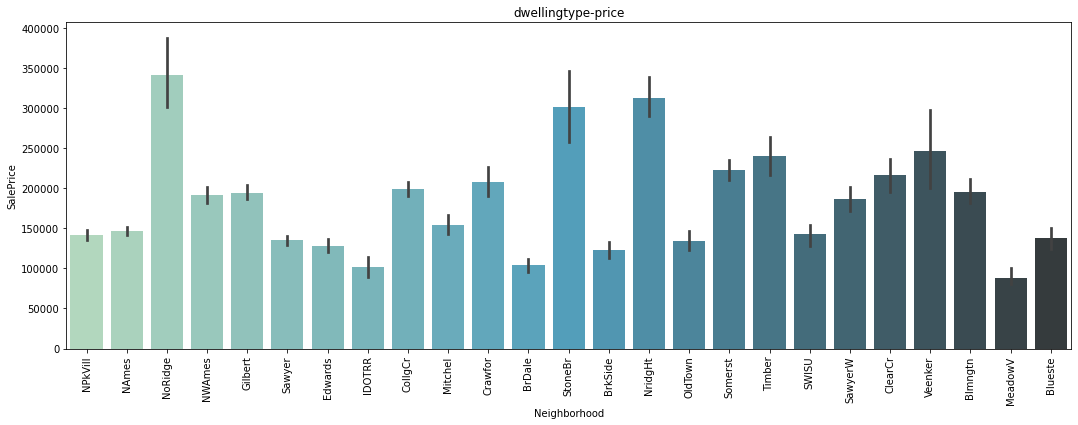

In [36]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'Neighborhood', y = 'SalePrice', data = df, palette= 'GnBu_d',).set_title('dwellingtype-price')
plt.xticks(Rotation = 90)
plt.show()

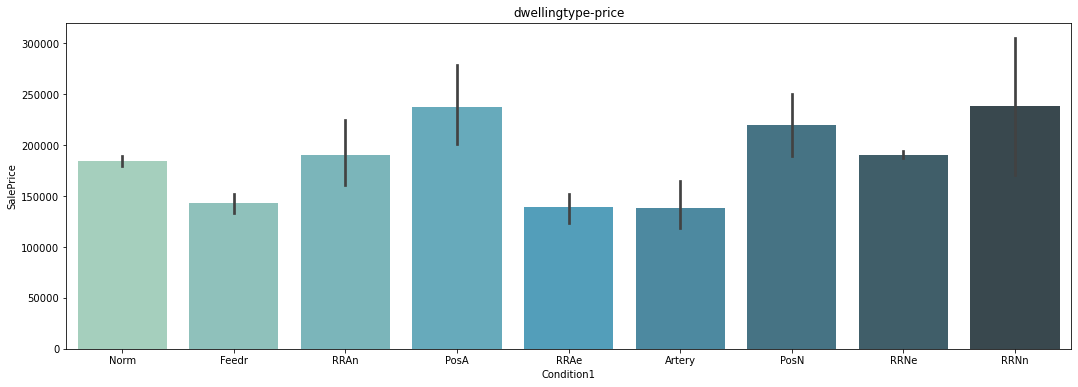

In [37]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'Condition1', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('dwellingtype-price')
plt.xticks
plt.show()

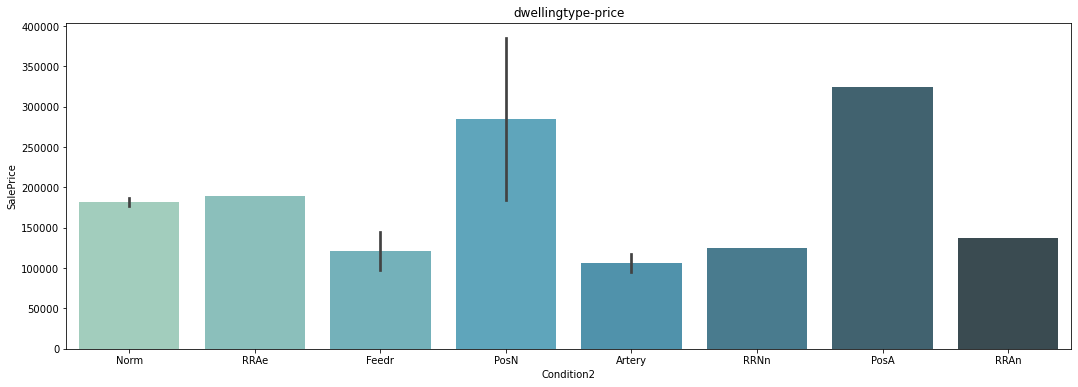

In [38]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'Condition2', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('dwellingtype-price')
plt.xticks
plt.show()

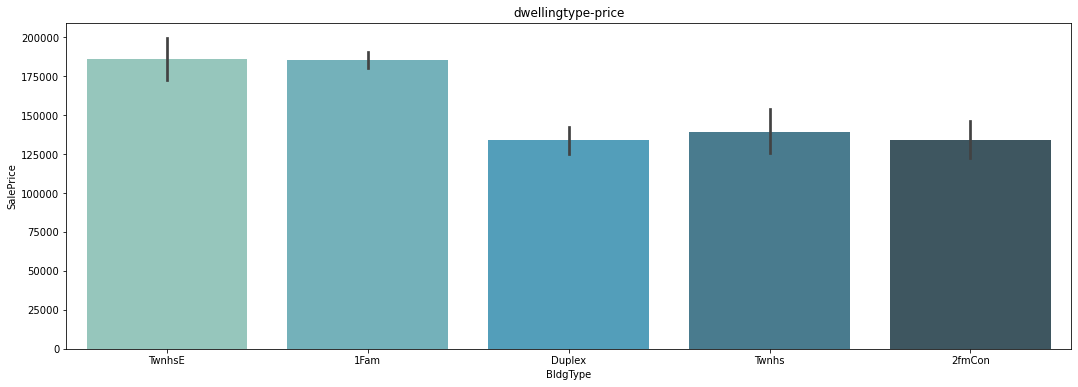

In [39]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'BldgType', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('dwellingtype-price')
plt.xticks
plt.show()

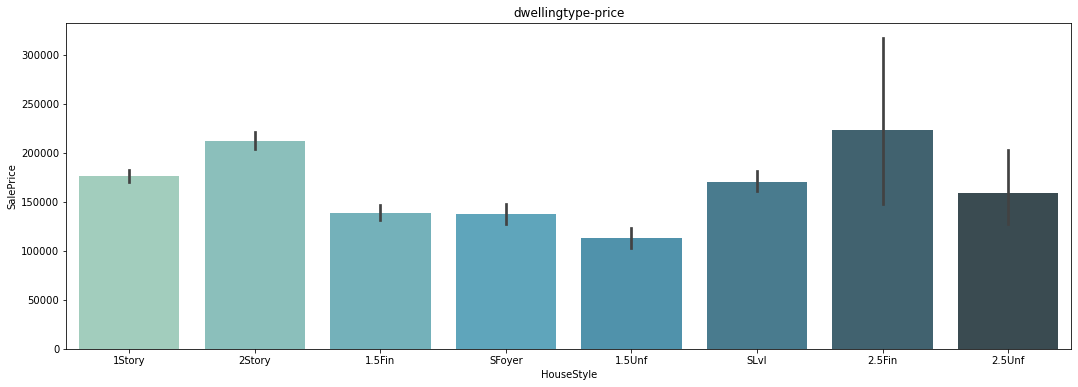

In [40]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'HouseStyle', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('dwellingtype-price')
plt.xticks
plt.show()

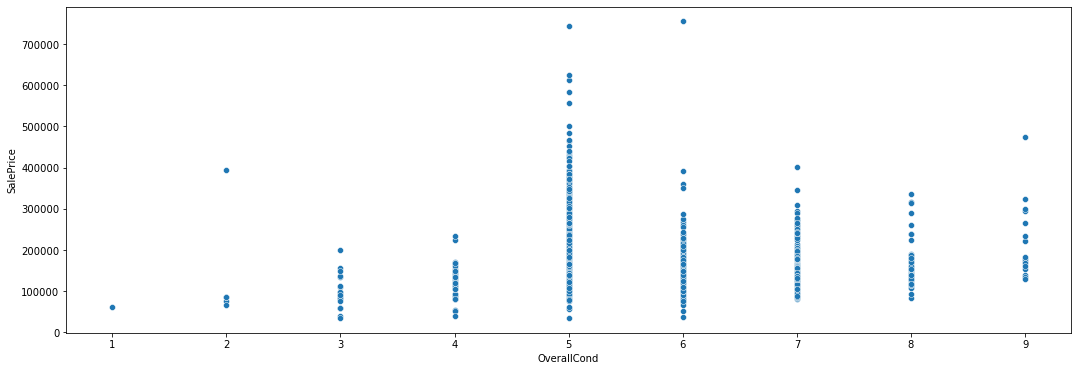

In [41]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='OverallCond',y='SalePrice',data=df)

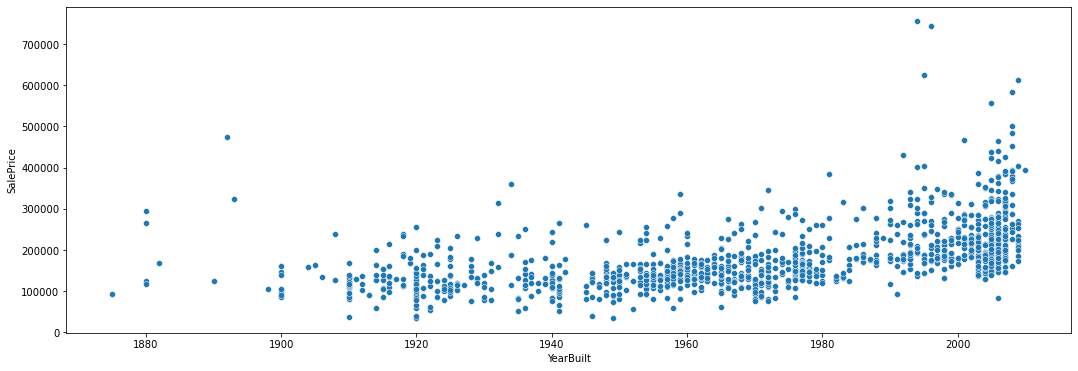

In [42]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='YearBuilt',y='SalePrice',data=df)

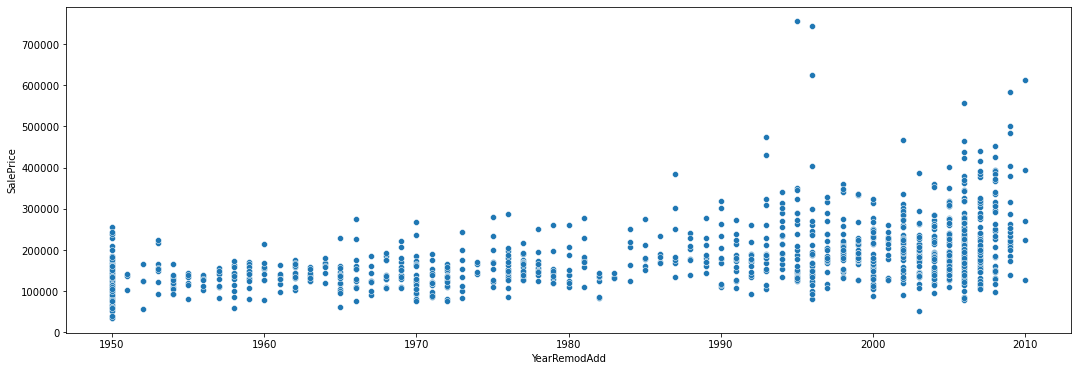

In [43]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='YearRemodAdd',y='SalePrice',data=df)

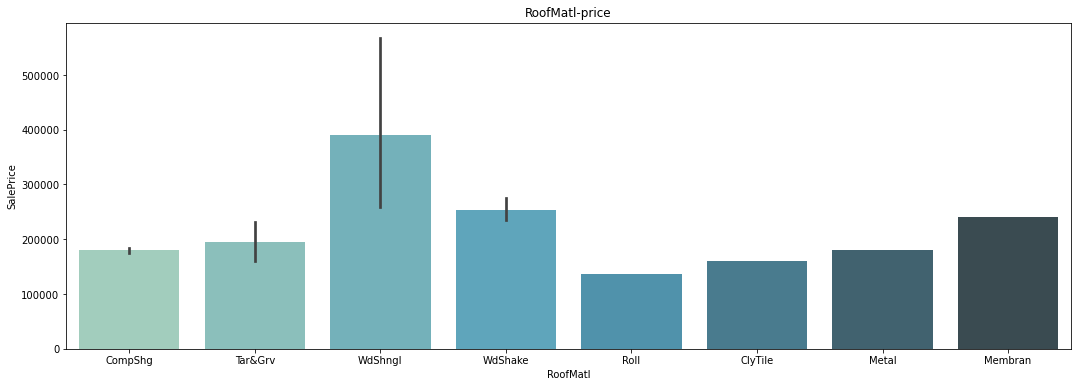

In [44]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'RoofMatl', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('RoofMatl-price')
plt.xticks
plt.show()

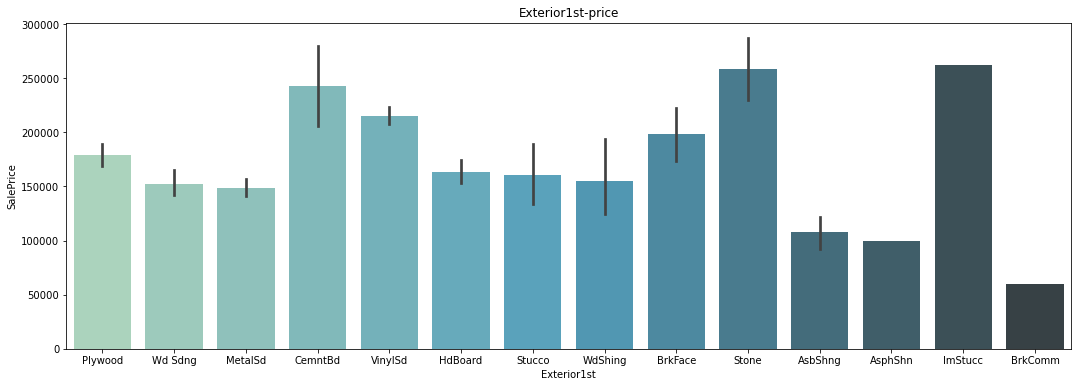

In [45]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'Exterior1st', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('Exterior1st-price')
plt.xticks
plt.show()

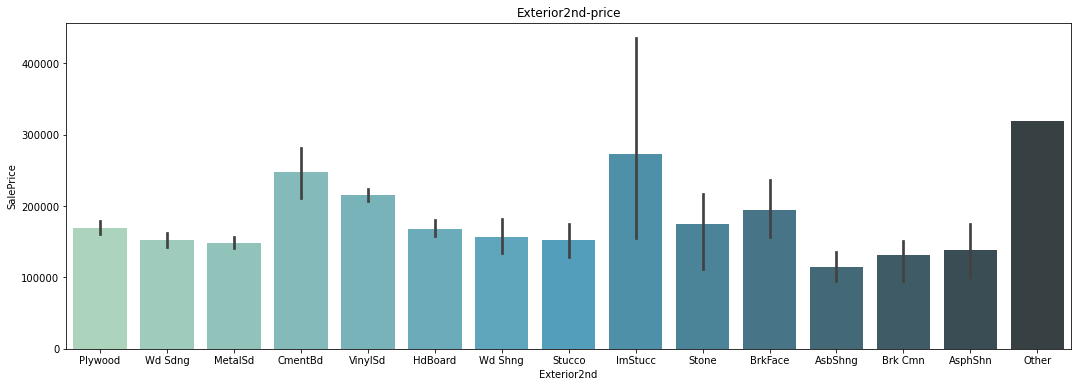

In [46]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'Exterior2nd', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('Exterior2nd-price')
plt.xticks
plt.show()

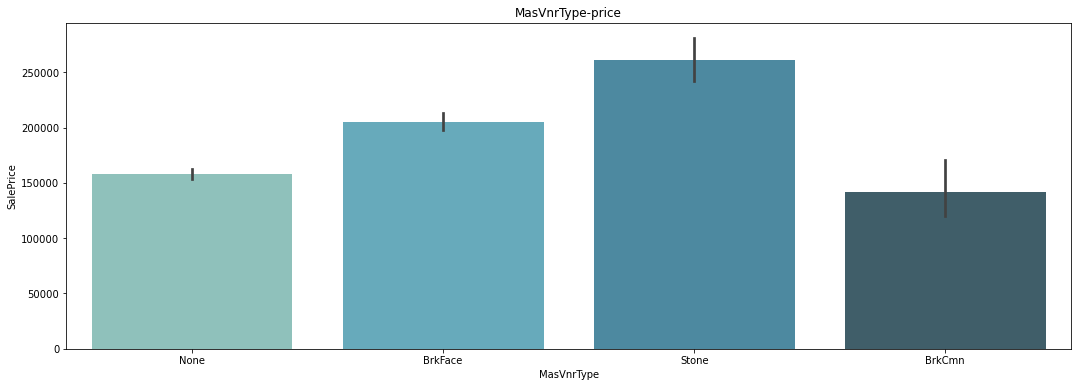

In [47]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'MasVnrType', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('MasVnrType-price')
plt.xticks
plt.show()

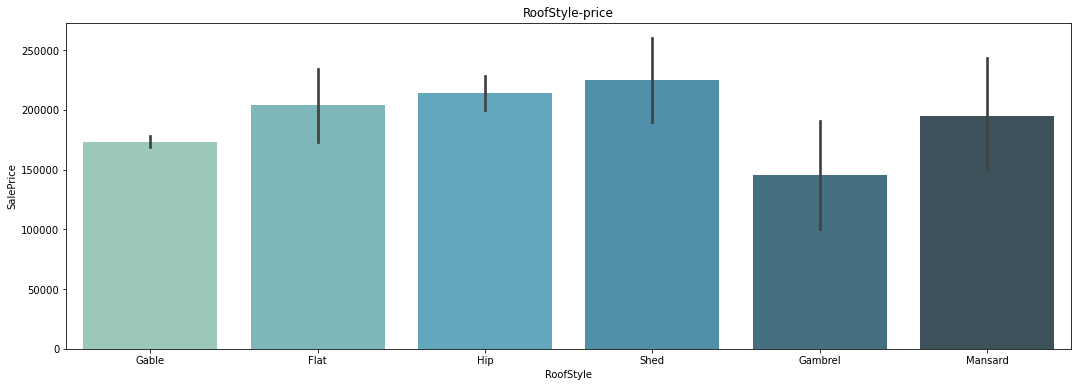

In [48]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'RoofStyle', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('RoofStyle-price')
plt.xticks
plt.show()

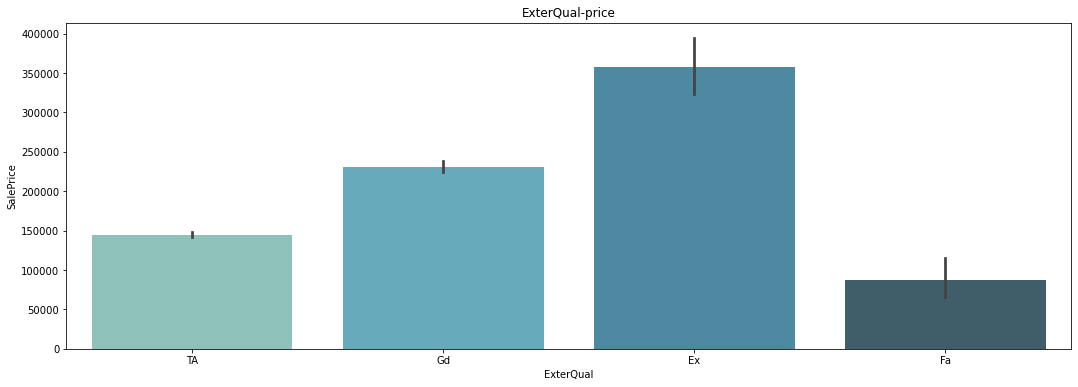

In [49]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'ExterQual', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('ExterQual-price')
plt.xticks
plt.show()

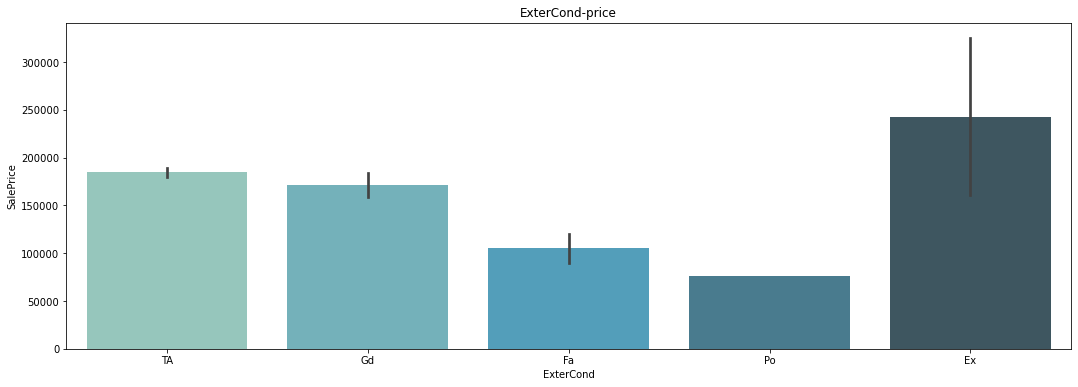

In [50]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'ExterCond', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('ExterCond-price')
plt.xticks
plt.show()

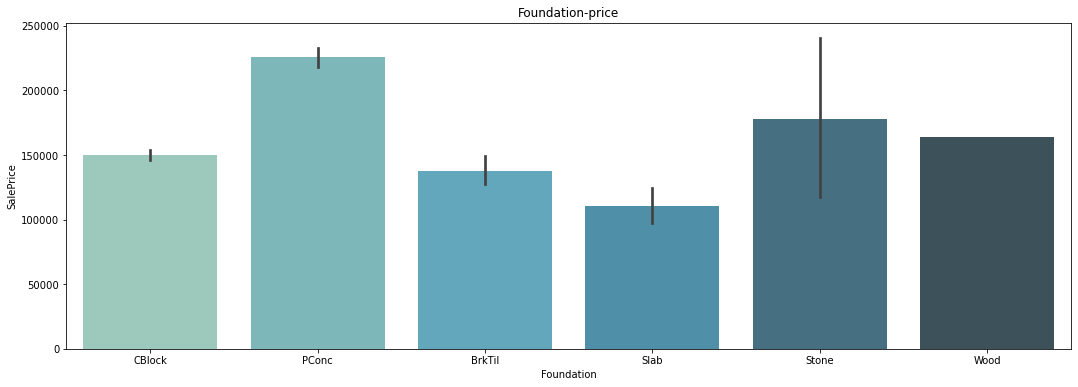

In [51]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'Foundation', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('Foundation-price')
plt.xticks
plt.show()

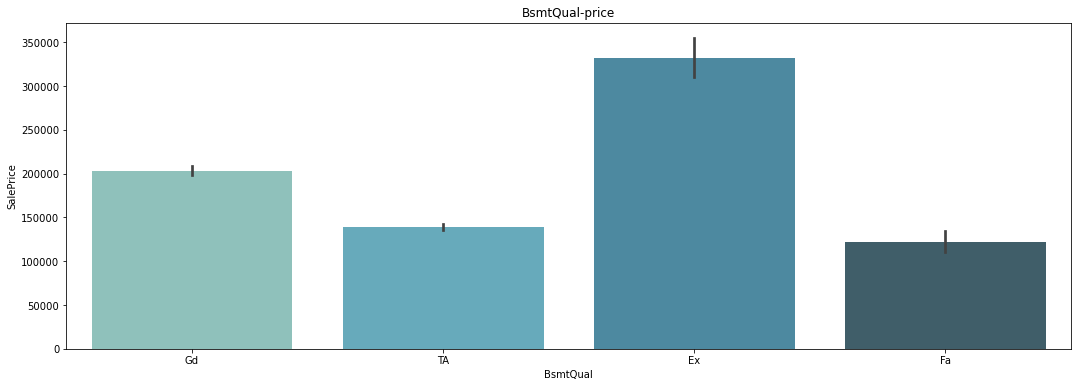

In [52]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'BsmtQual', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('BsmtQual-price')
plt.xticks
plt.show()

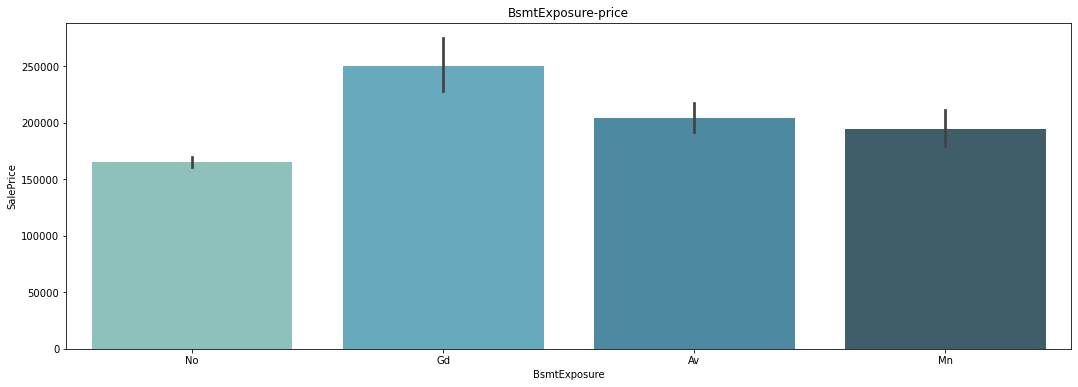

In [53]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'BsmtExposure', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('BsmtExposure-price')
plt.xticks
plt.show()

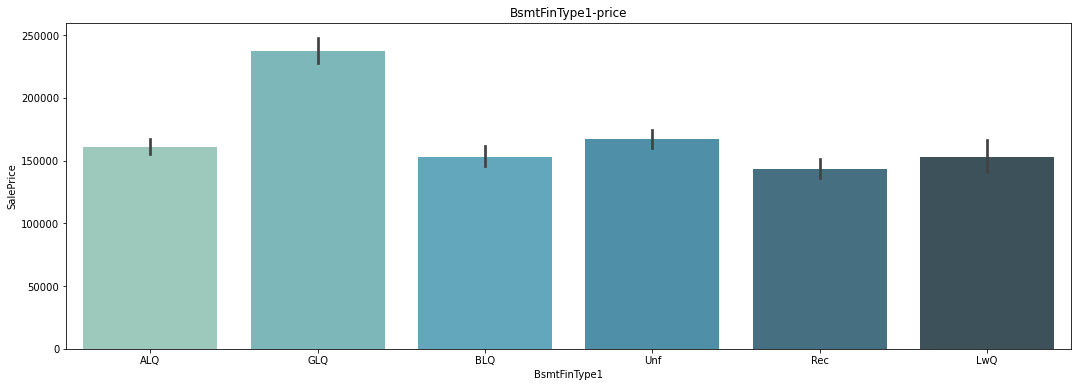

In [54]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'BsmtFinType1', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('BsmtFinType1-price')
plt.xticks
plt.show()

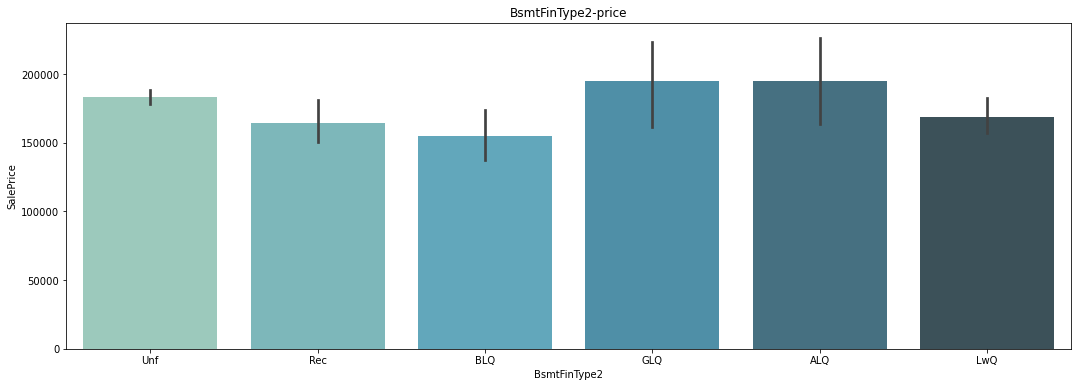

In [55]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'BsmtFinType2', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('BsmtFinType2-price')
plt.xticks
plt.show()

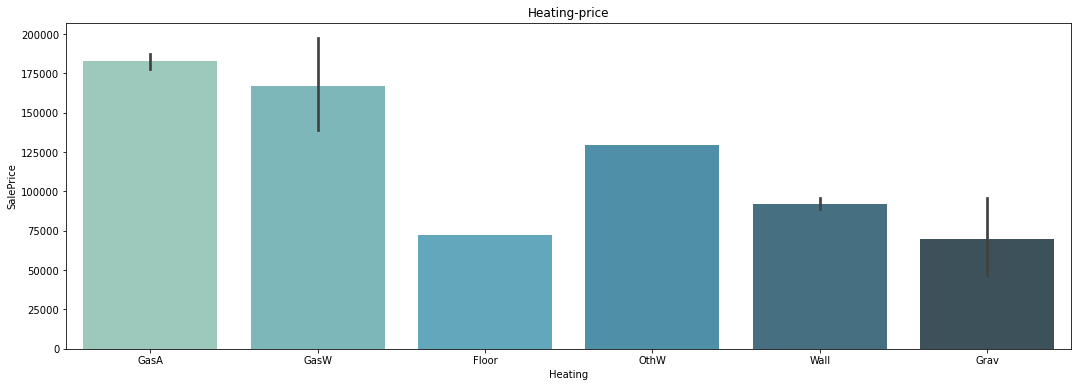

In [56]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'Heating', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('Heating-price')
plt.xticks
plt.show()

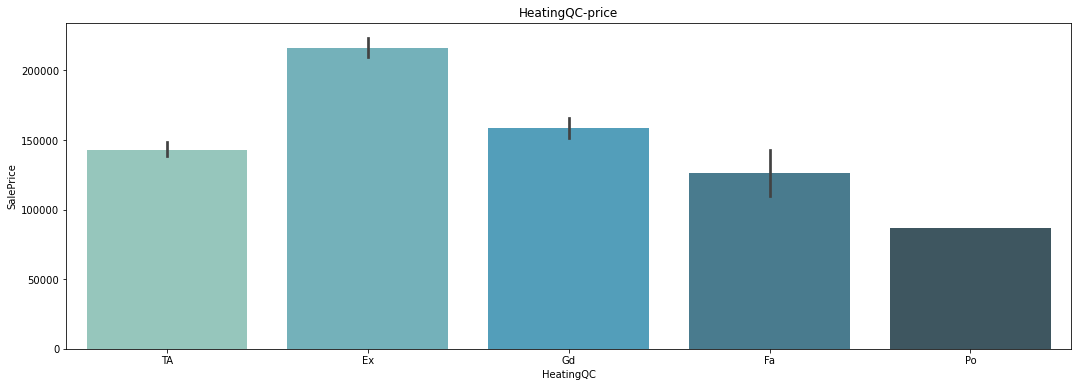

In [57]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'HeatingQC', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('HeatingQC-price')
plt.xticks
plt.show()

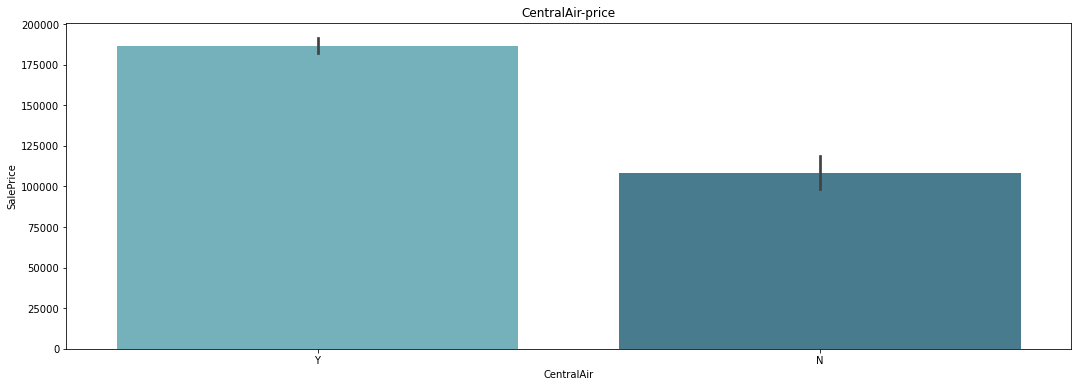

In [58]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'CentralAir', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('CentralAir-price')
plt.xticks
plt.show()

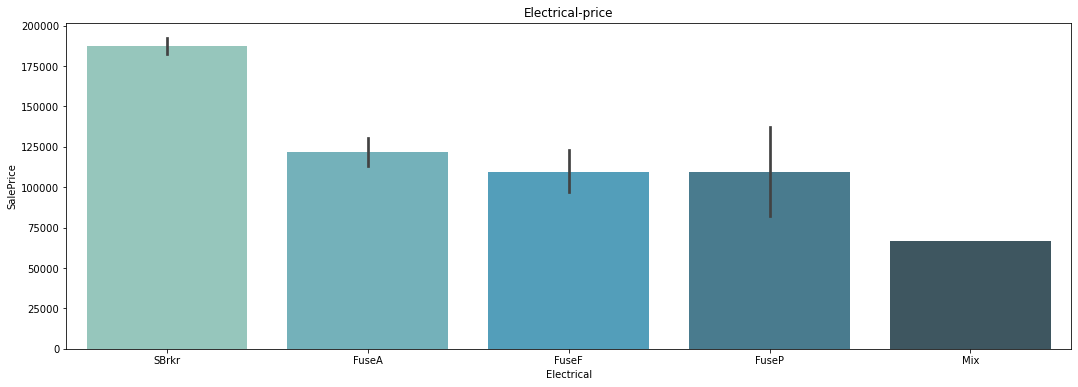

In [59]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'Electrical', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('Electrical-price')
plt.xticks
plt.show()

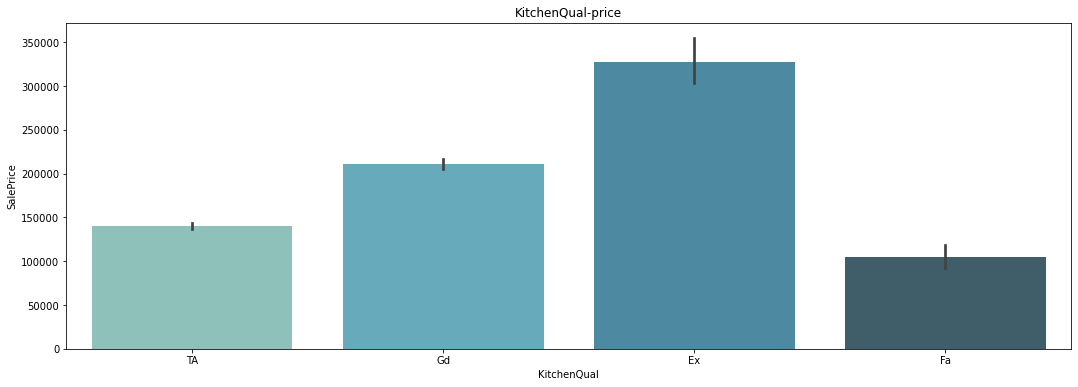

In [60]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'KitchenQual', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('KitchenQual-price')
plt.xticks
plt.show()

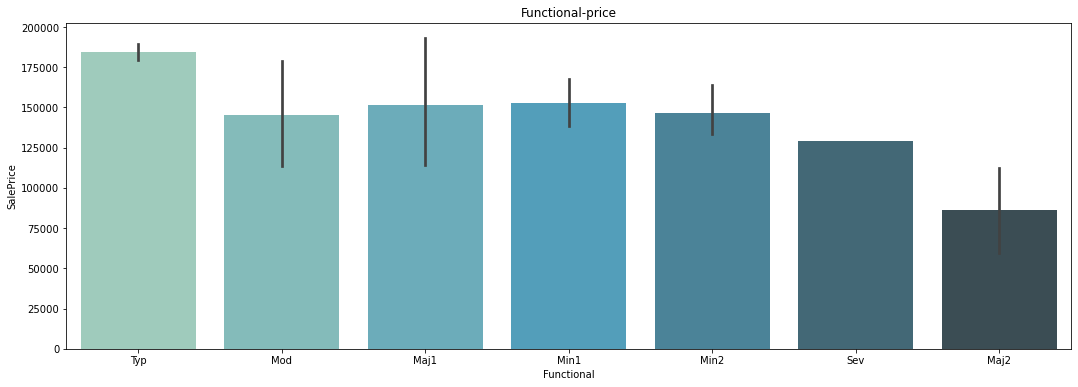

In [61]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'Functional', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('Functional-price')
plt.xticks
plt.show()

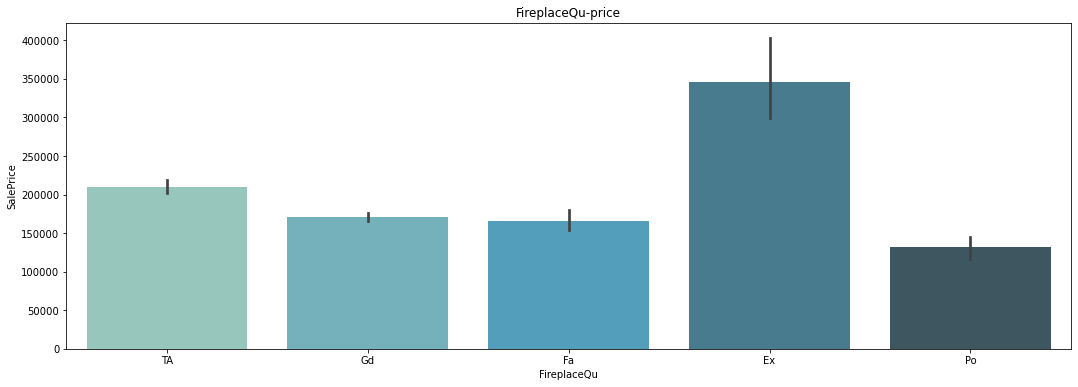

In [62]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'FireplaceQu', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('FireplaceQu-price')
plt.xticks
plt.show()

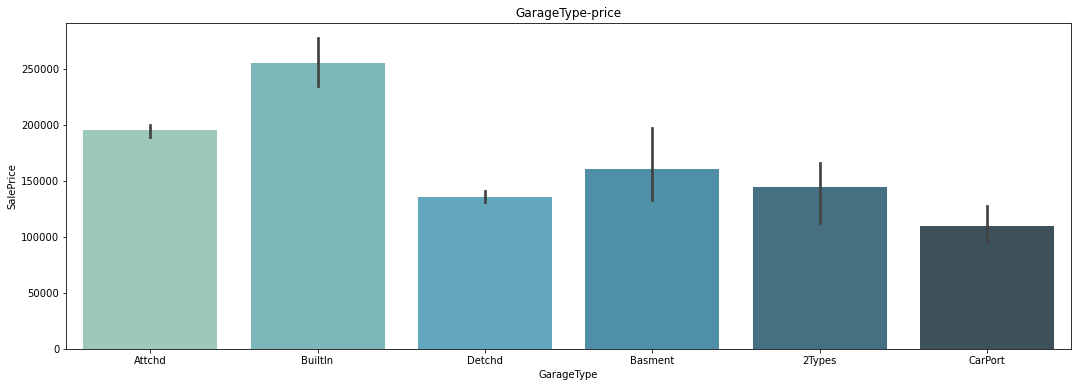

In [63]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'GarageType', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('GarageType-price')
plt.xticks
plt.show()

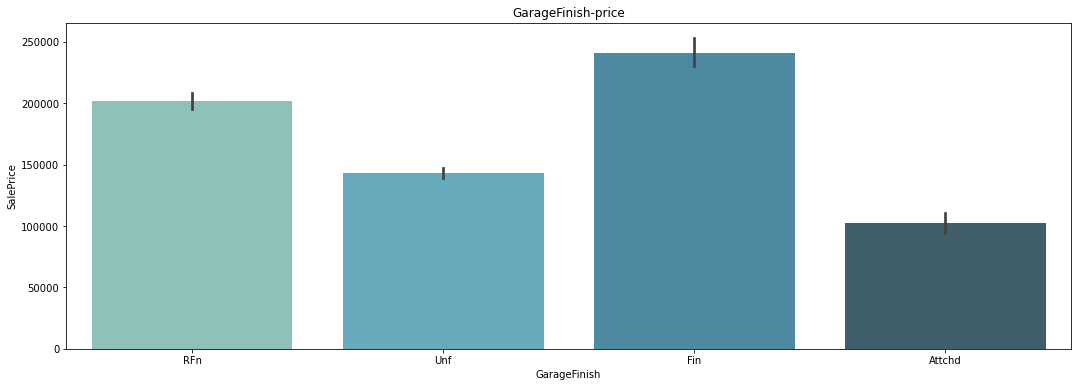

In [64]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'GarageFinish', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('GarageFinish-price')
plt.xticks
plt.show()

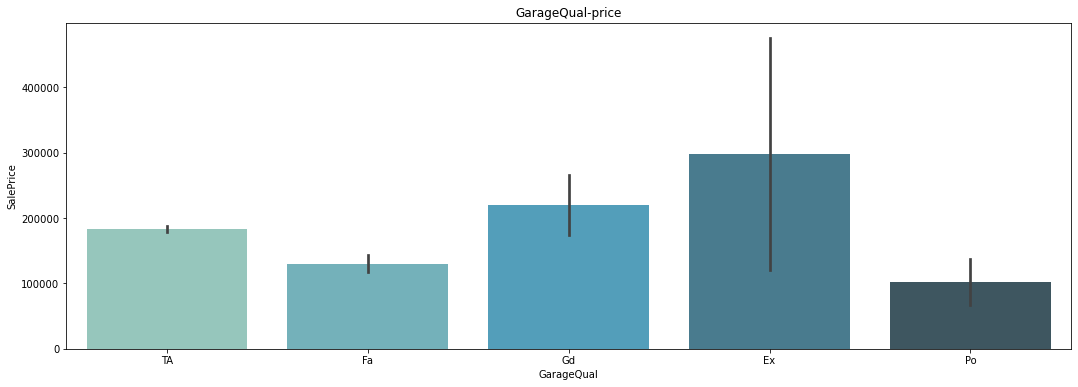

In [65]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'GarageQual', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('GarageQual-price')
plt.xticks
plt.show()

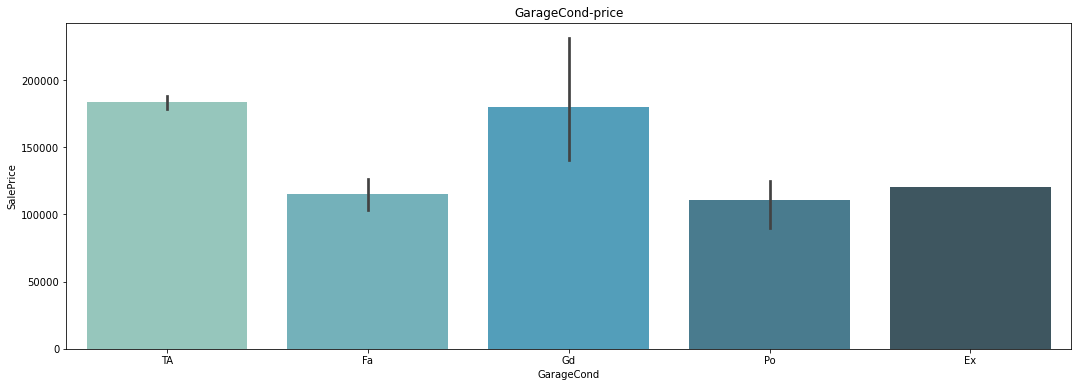

In [66]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'GarageCond', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('GarageCond-price')
plt.xticks
plt.show()

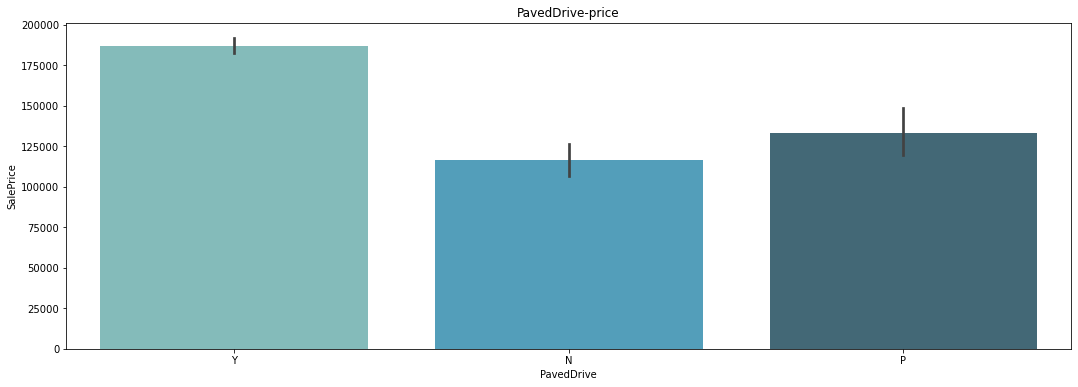

In [67]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'PavedDrive', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('PavedDrive-price')
plt.xticks
plt.show()

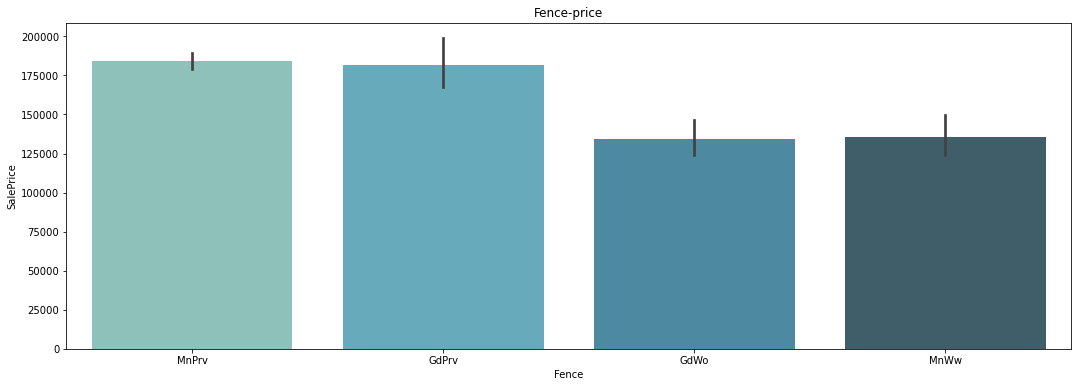

In [68]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'Fence', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('Fence-price')
plt.xticks
plt.show()

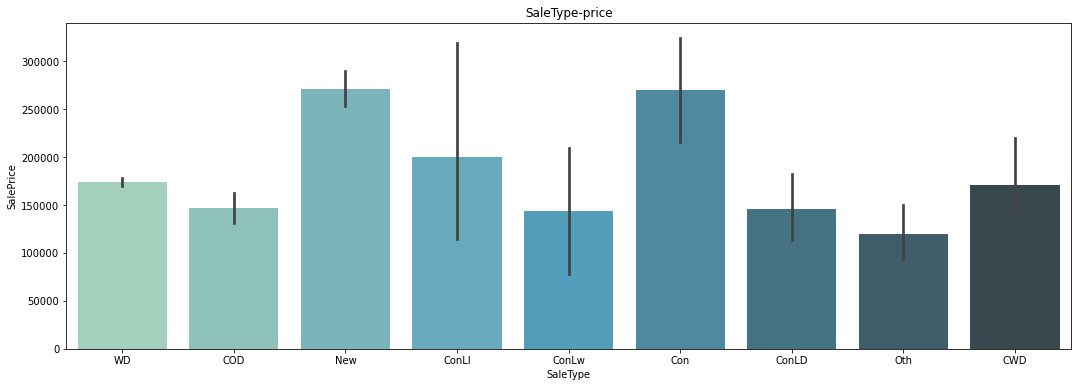

In [69]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'SaleType', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('SaleType-price')
plt.xticks
plt.show()

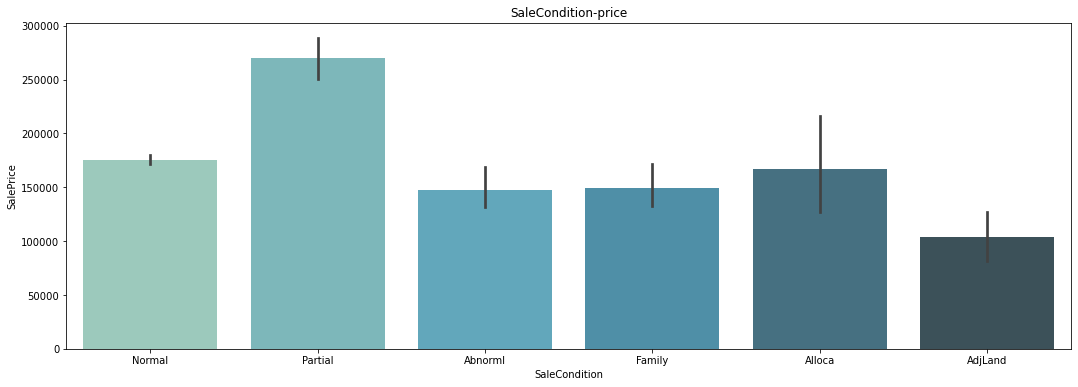

In [70]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'SaleCondition', y = 'SalePrice', data = df, palette= 'GnBu_d').set_title('SaleCondition-price')
plt.xticks
plt.show()

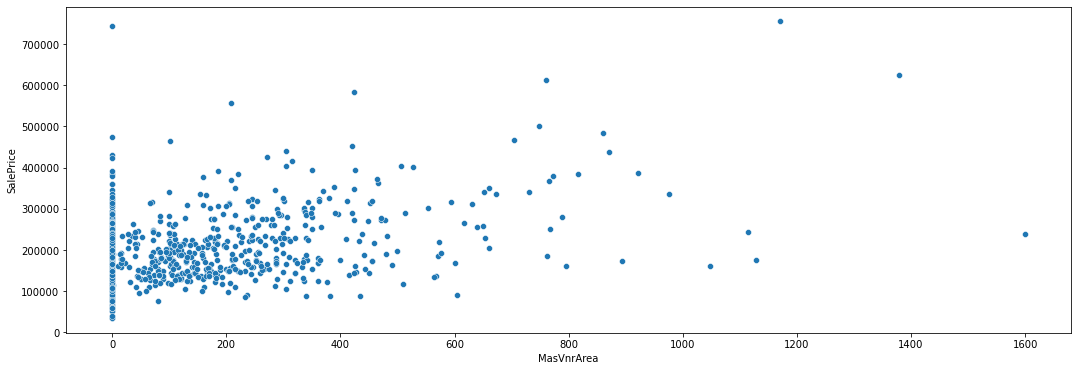

In [71]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='MasVnrArea',y='SalePrice',data=df)

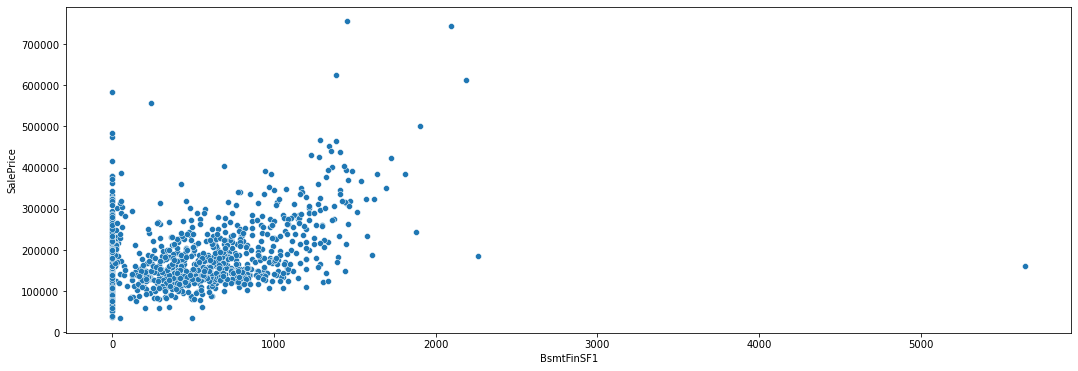

In [72]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='BsmtFinSF1',y='SalePrice',data=df)

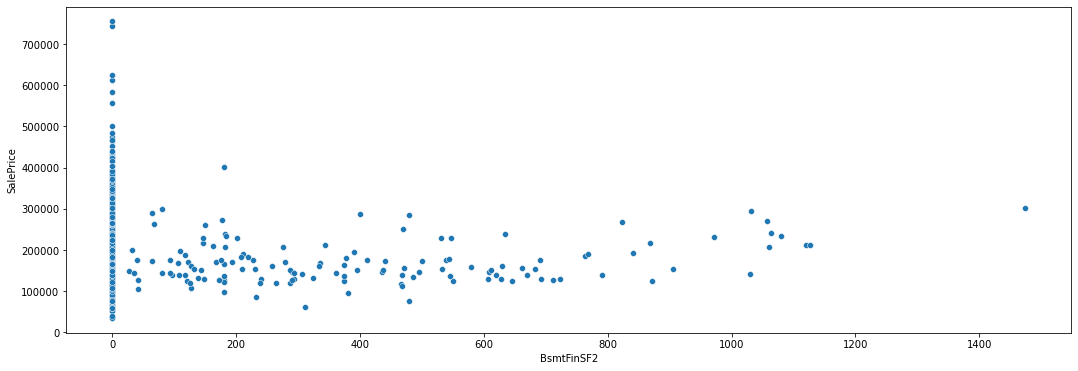

In [73]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='BsmtFinSF2',y='SalePrice',data=df)

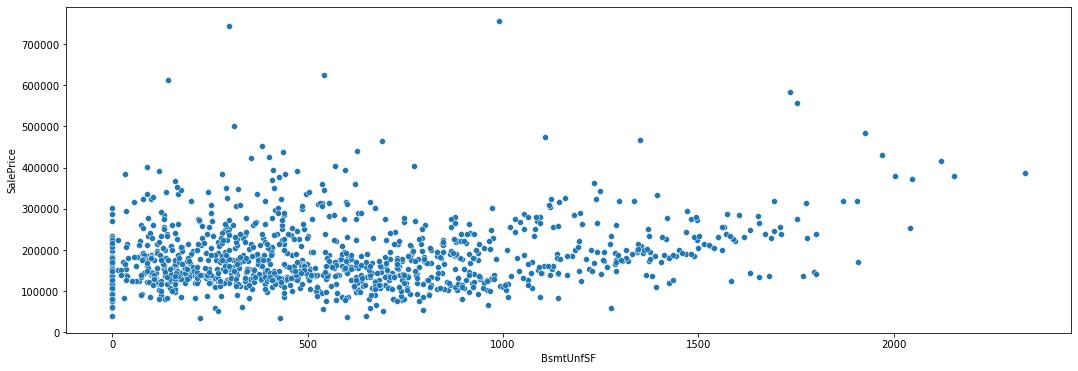

In [74]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='BsmtUnfSF',y='SalePrice',data=df)

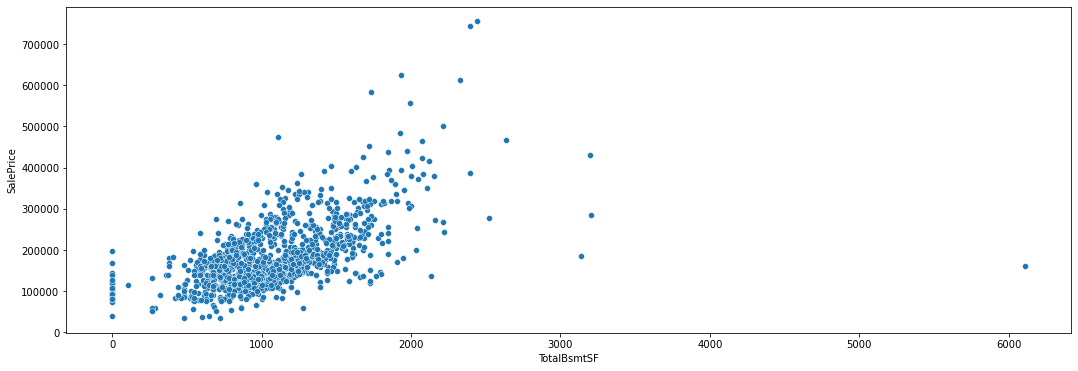

In [75]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=df)

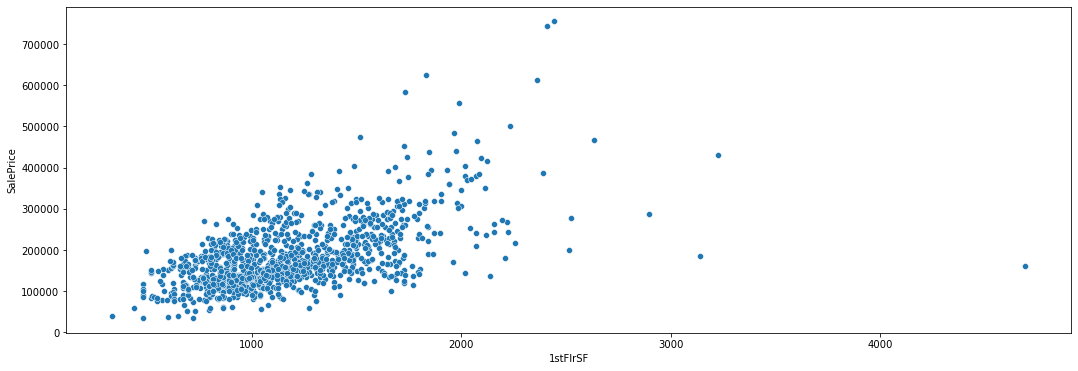

In [76]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='1stFlrSF',y='SalePrice',data=df)

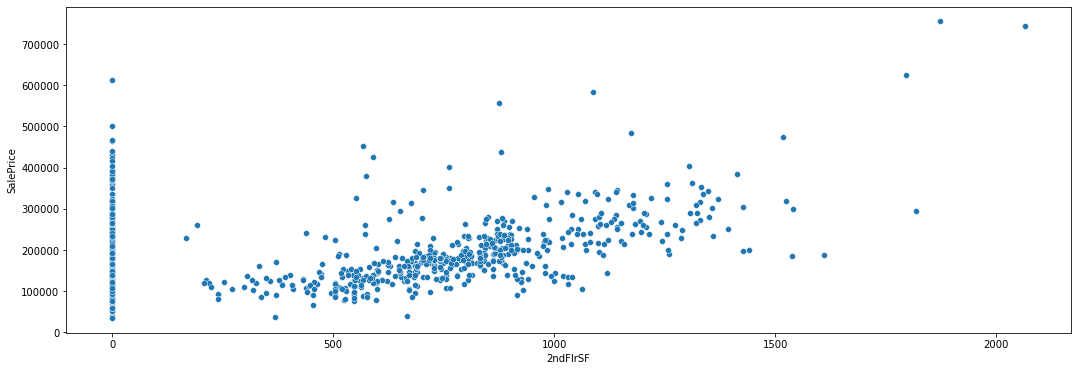

In [77]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='2ndFlrSF',y='SalePrice',data=df)

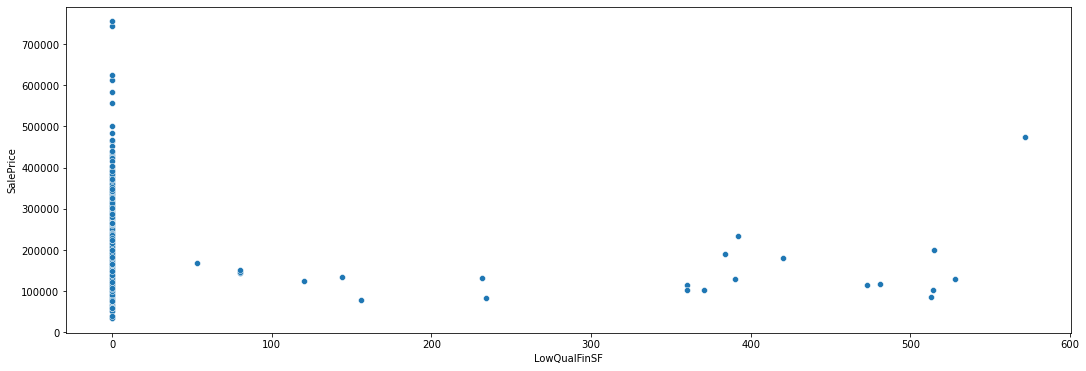

In [78]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='LowQualFinSF',y='SalePrice',data=df)

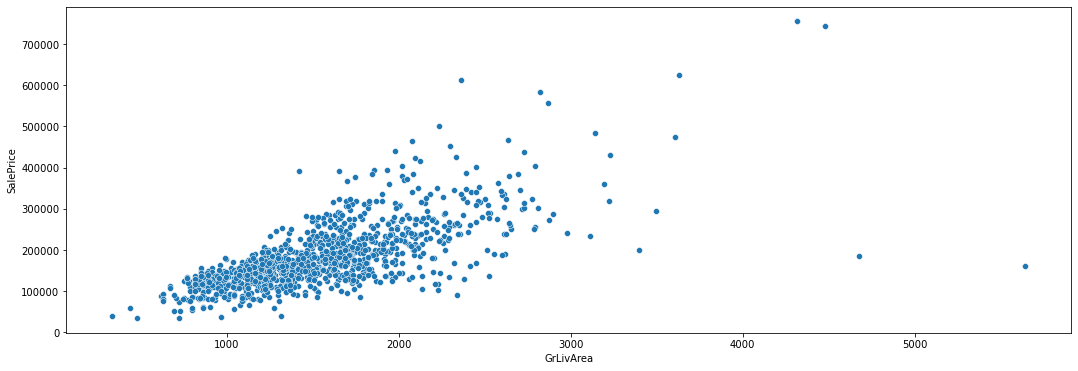

In [79]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df)

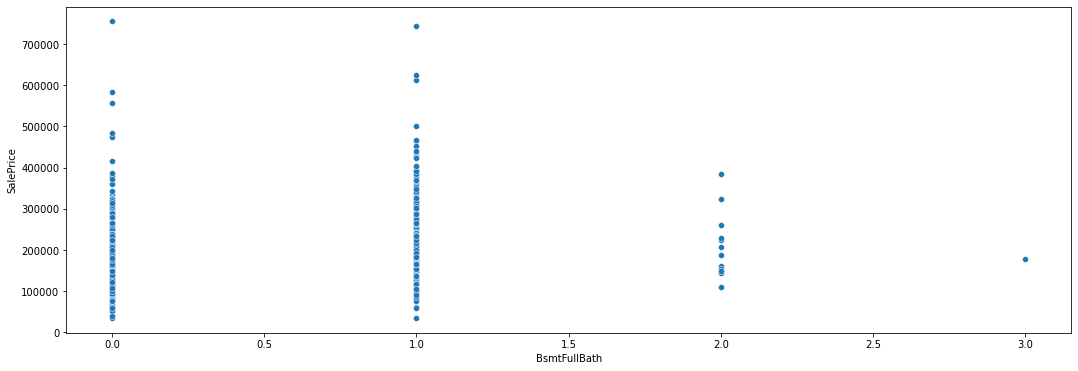

In [80]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='BsmtFullBath',y='SalePrice',data=df)

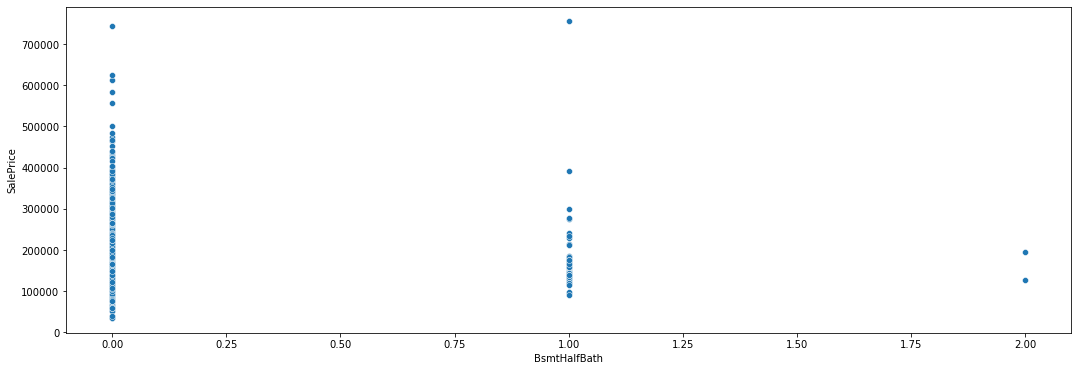

In [81]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='BsmtHalfBath',y='SalePrice',data=df)

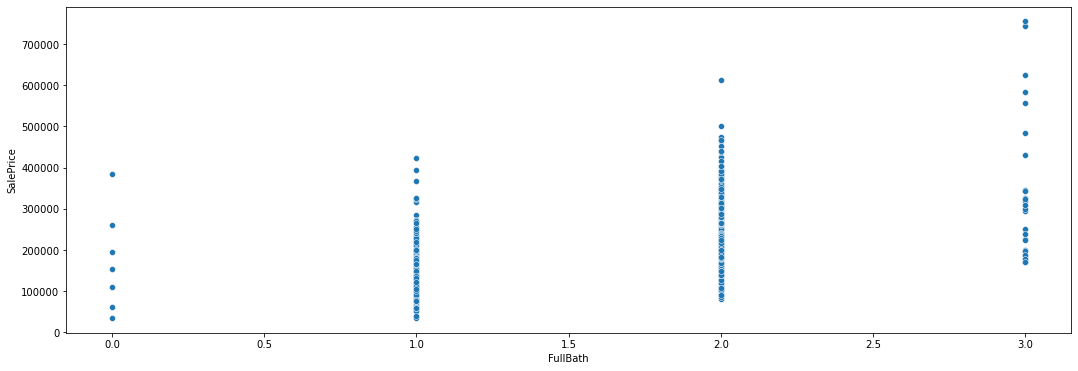

In [82]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='FullBath',y='SalePrice',data=df)

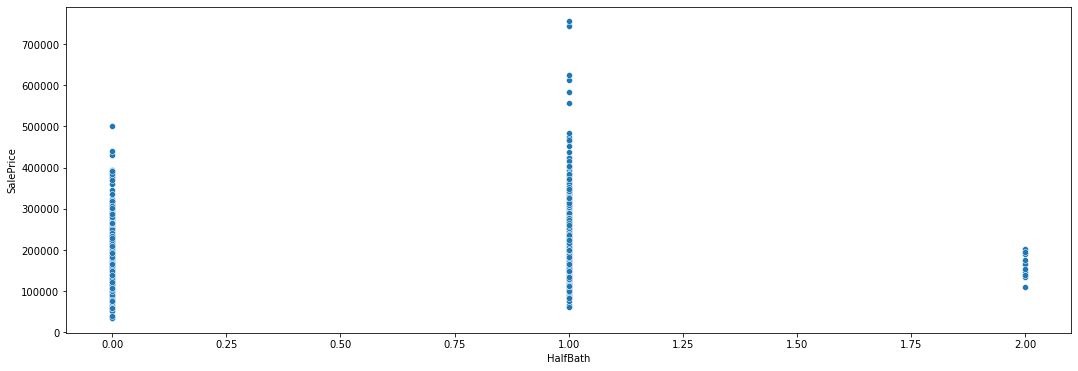

In [83]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='HalfBath',y='SalePrice',data=df)

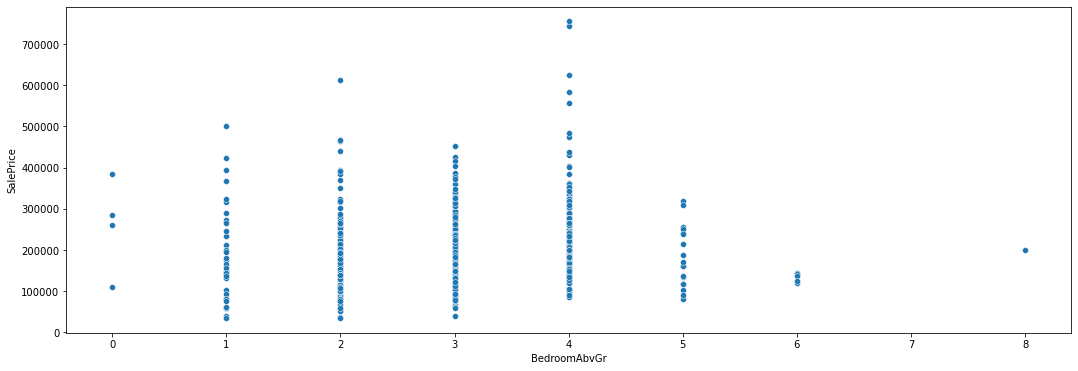

In [84]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='BedroomAbvGr',y='SalePrice',data=df)

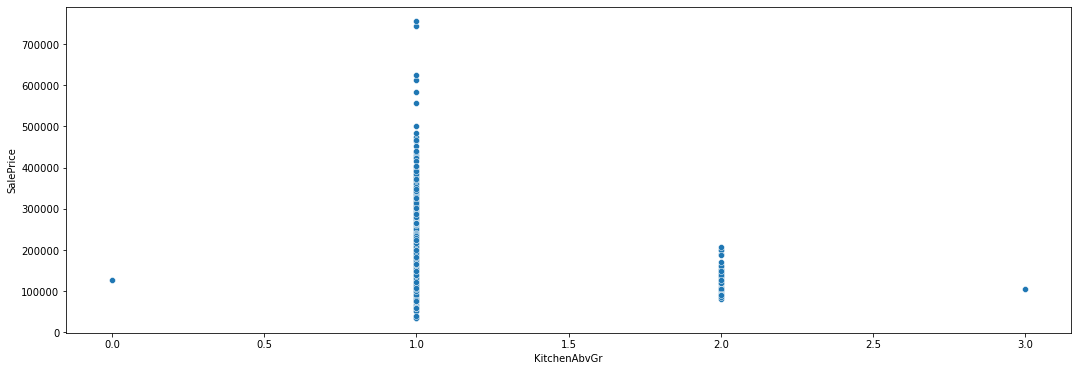

In [85]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='KitchenAbvGr',y='SalePrice',data=df)

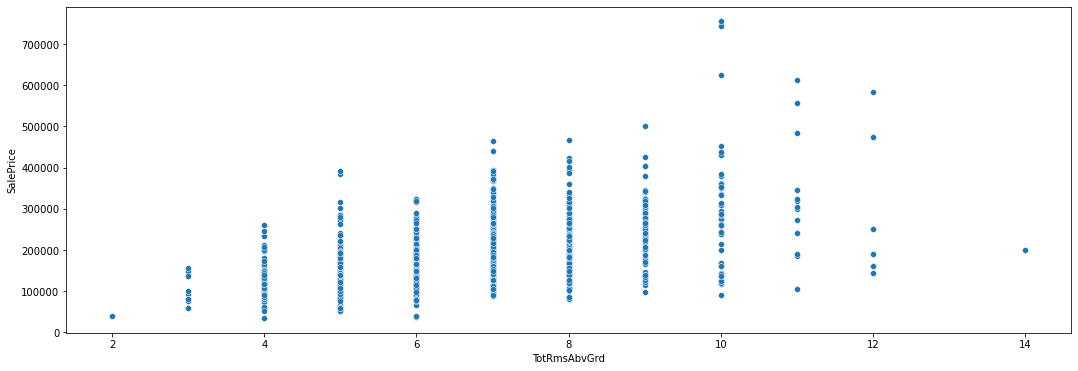

In [86]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='TotRmsAbvGrd',y='SalePrice',data=df)

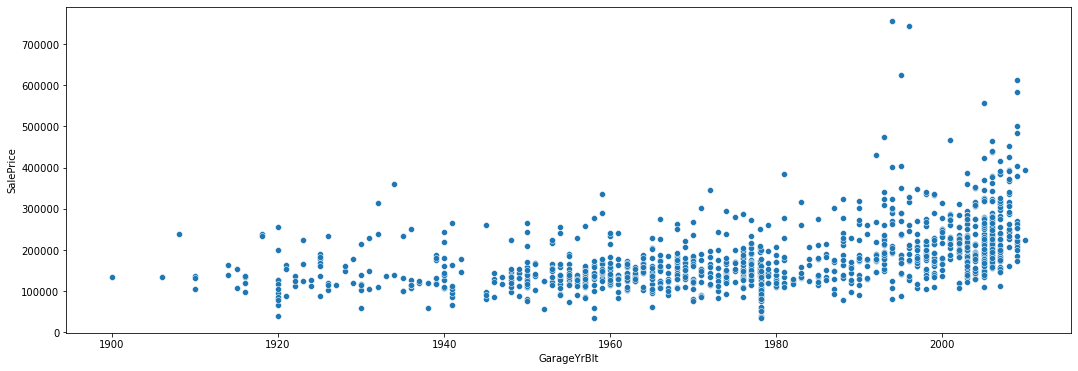

In [87]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='GarageYrBlt',y='SalePrice',data=df)

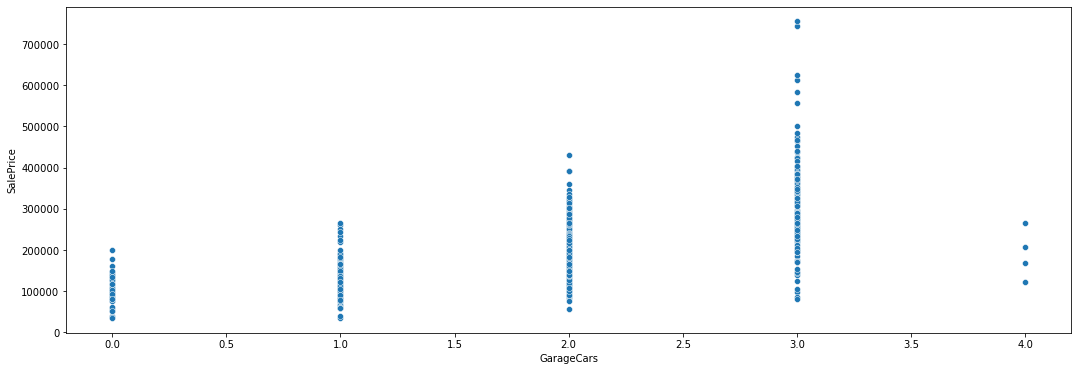

In [88]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='GarageCars',y='SalePrice',data=df)

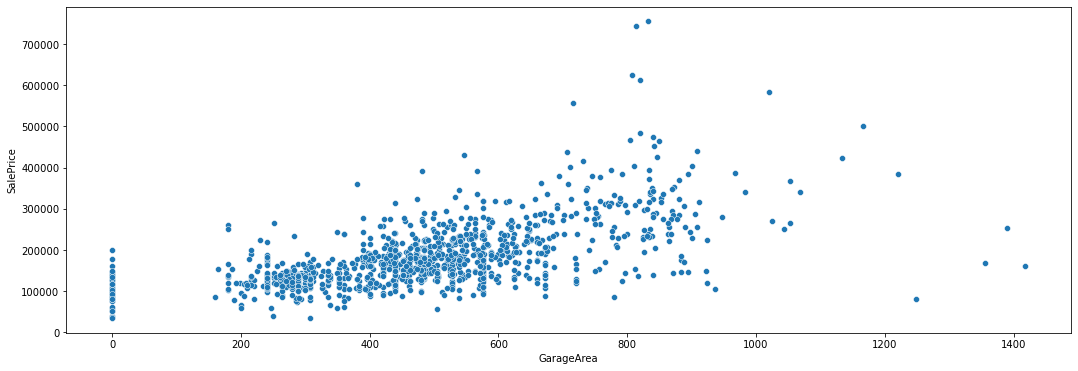

In [89]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='GarageArea',y='SalePrice',data=df)

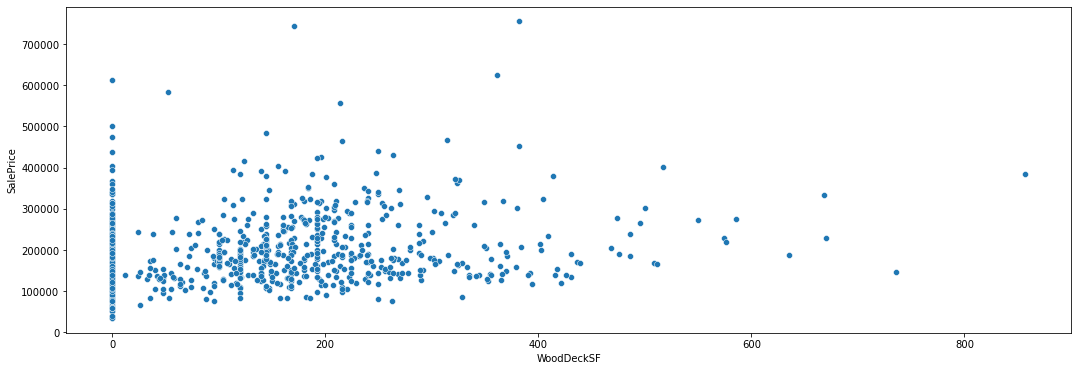

In [90]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='WoodDeckSF',y='SalePrice',data=df)

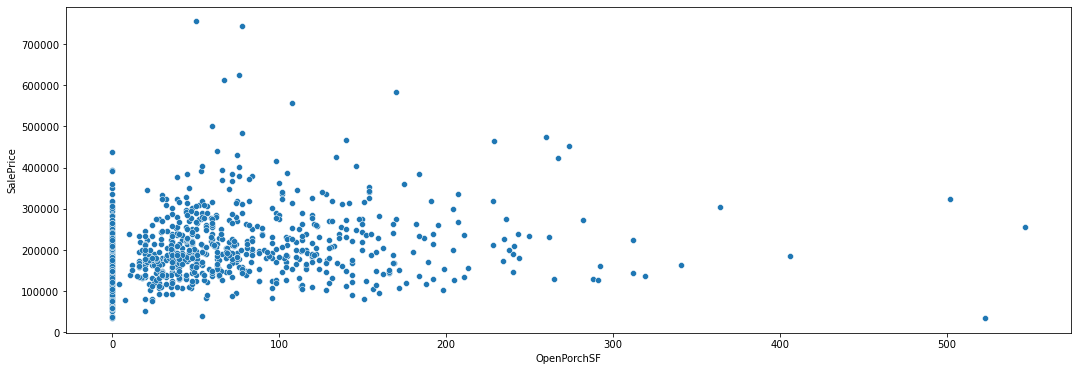

In [91]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='OpenPorchSF',y='SalePrice',data=df)

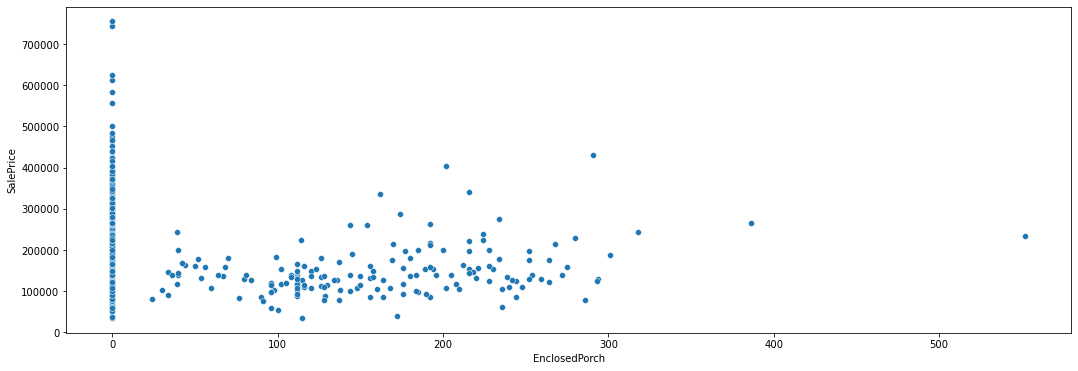

In [92]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='EnclosedPorch',y='SalePrice',data=df)

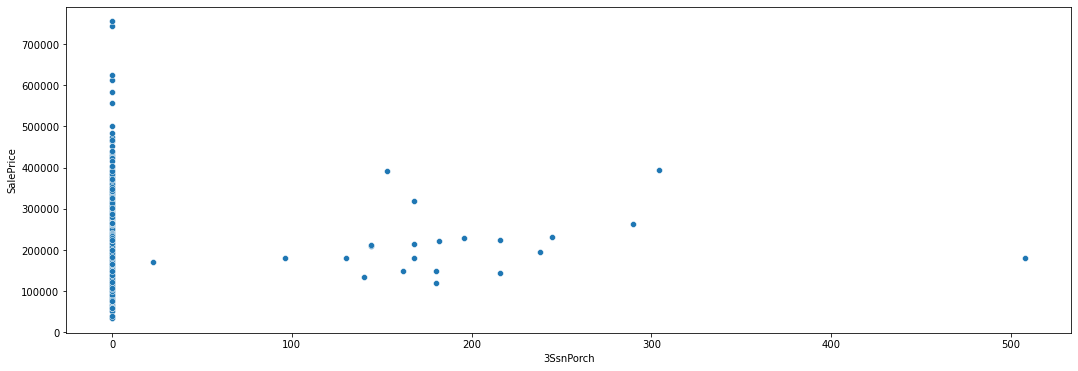

In [93]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='3SsnPorch',y='SalePrice',data=df)

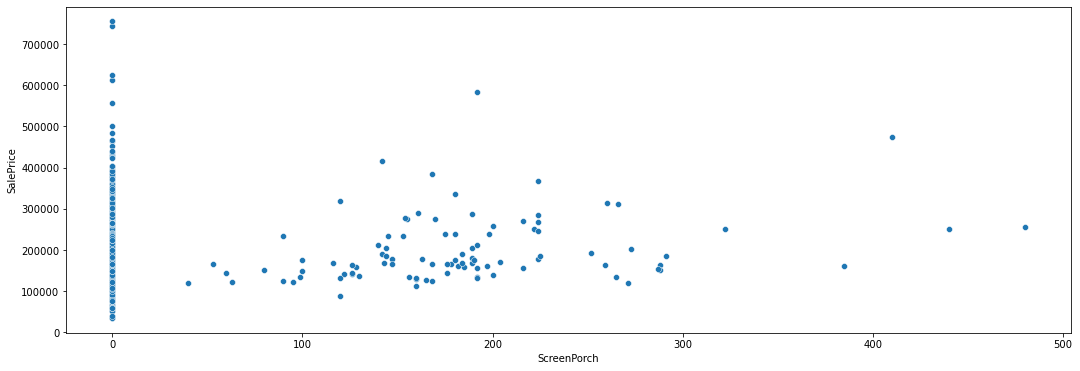

In [94]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='ScreenPorch',y='SalePrice',data=df)

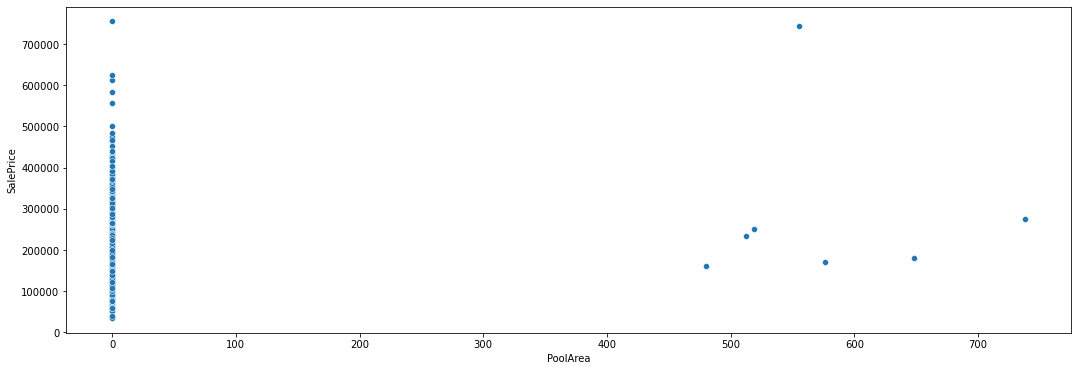

In [95]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='PoolArea',y='SalePrice',data=df)

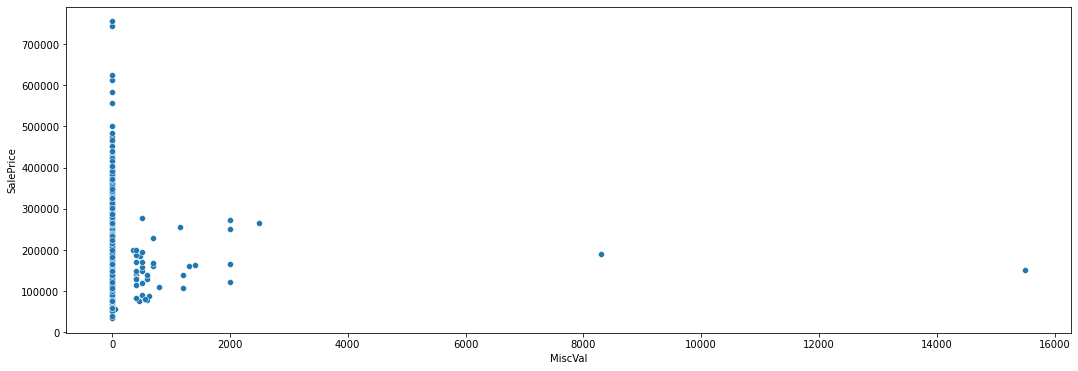

In [96]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='MiscVal',y='SalePrice',data=df)

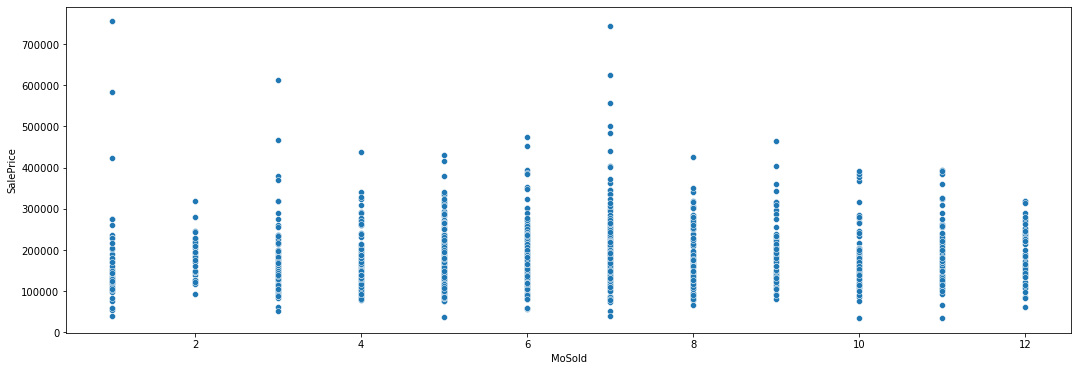

In [97]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='MoSold',y='SalePrice',data=df)

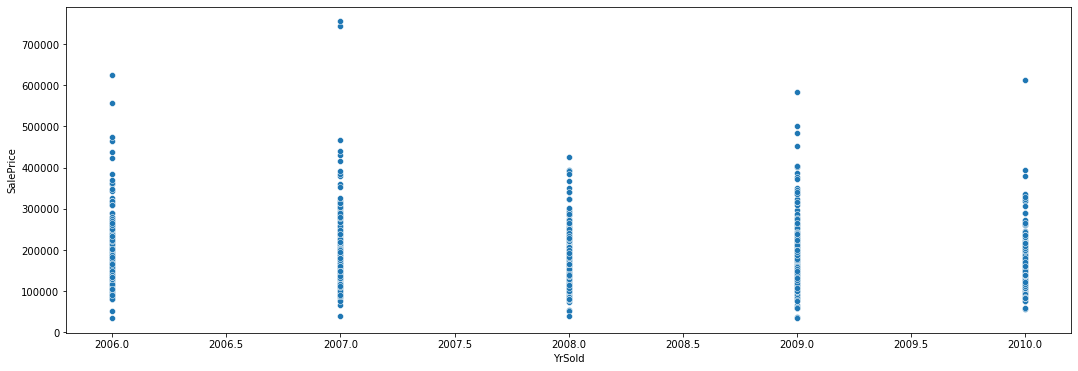

In [98]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='YrSold',y='SalePrice',data=df)


In [99]:
df

,Dwelling,Zone,Lotfrontage,SQFT,Street,LotShape,Flatness,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,70.98847,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,MnPrv,0,2,2007,WD,Normal,128000
1,20,RL,95.00000,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,MnPrv,0,10,2007,WD,Normal,268000
2,60,RL,92.00000,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,MnPrv,0,6,2007,WD,Normal,269790
3,20,RL,105.00000,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,MnPrv,0,1,2010,COD,Normal,190000
4,20,RL,70.98847,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,MnPrv,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,RL,70.98847,9819,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,Gd,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,MnPrv,0,2,2010,WD,Normal,122000
1164,20,RL,67.00000,8777,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,Gd,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,MnPrv,0,5,2009,WD,Normal,108000
1165,160,RL,24.00000,2280,Pave,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,MnPrv,0,7,2009,WD,Normal,148500
1166,70,C (all),50.00000,8500,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,Gd,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,MnPrv,0,7,2008,WD,Normal,40000


In [100]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

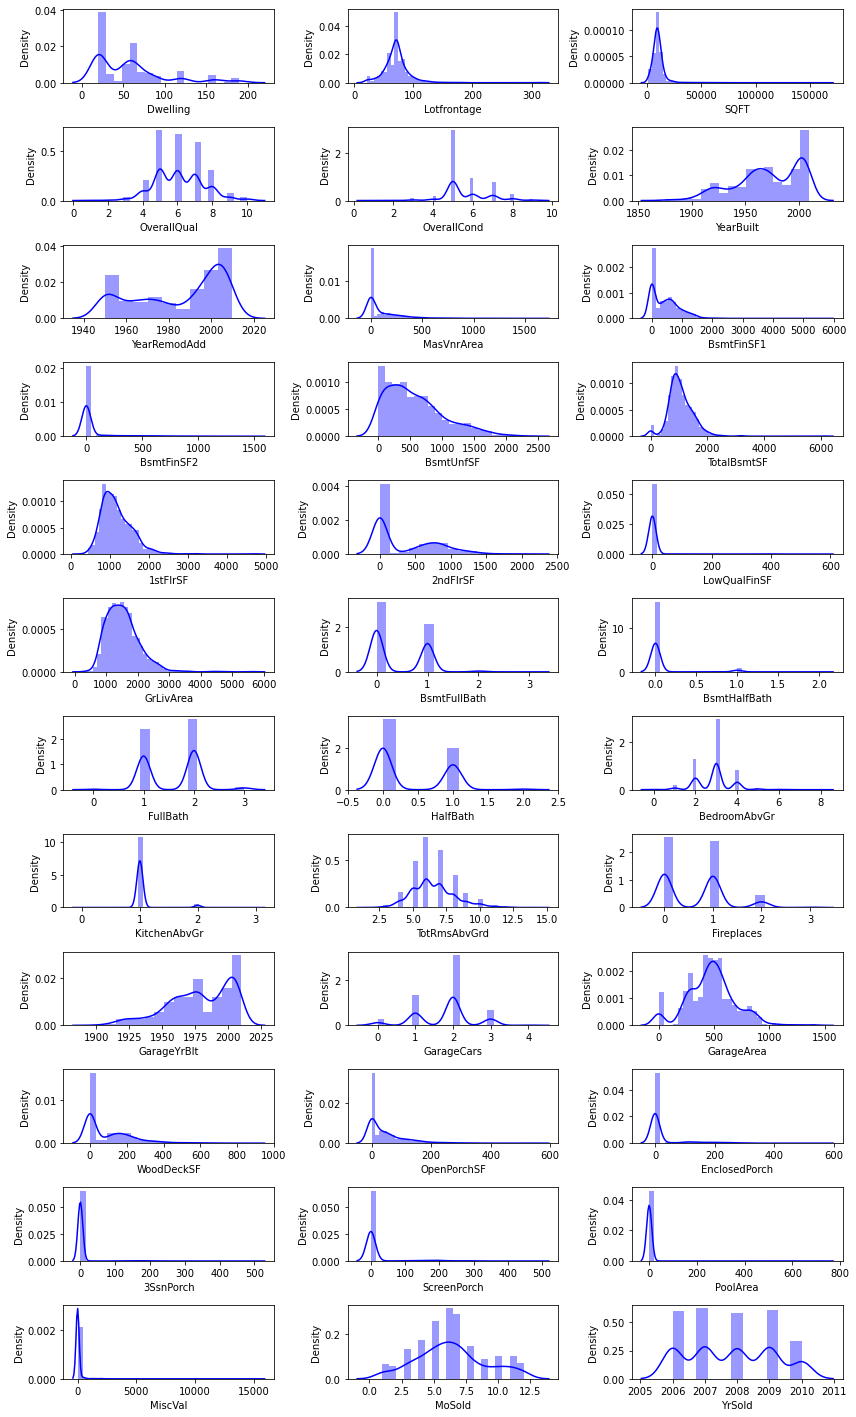

In [101]:
fig=plt.subplots(figsize=(12, 21))
i=0
for feature in numeric_df.columns:
    if feature not in ['Id', 'SalePrice']:
        i+=1
        plt.subplot(13, 3, i)
        sns.distplot(df[feature], color='blue')
        plt.tight_layout()

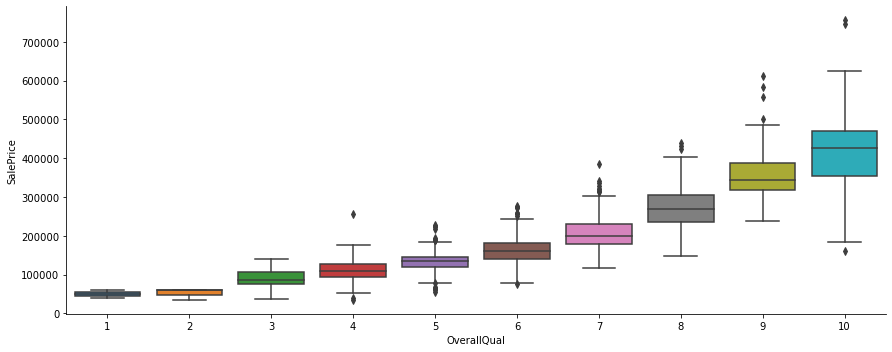

In [102]:
g = sns.factorplot(x="OverallQual",y="SalePrice",data=df,kind='box',aspect=2.5)

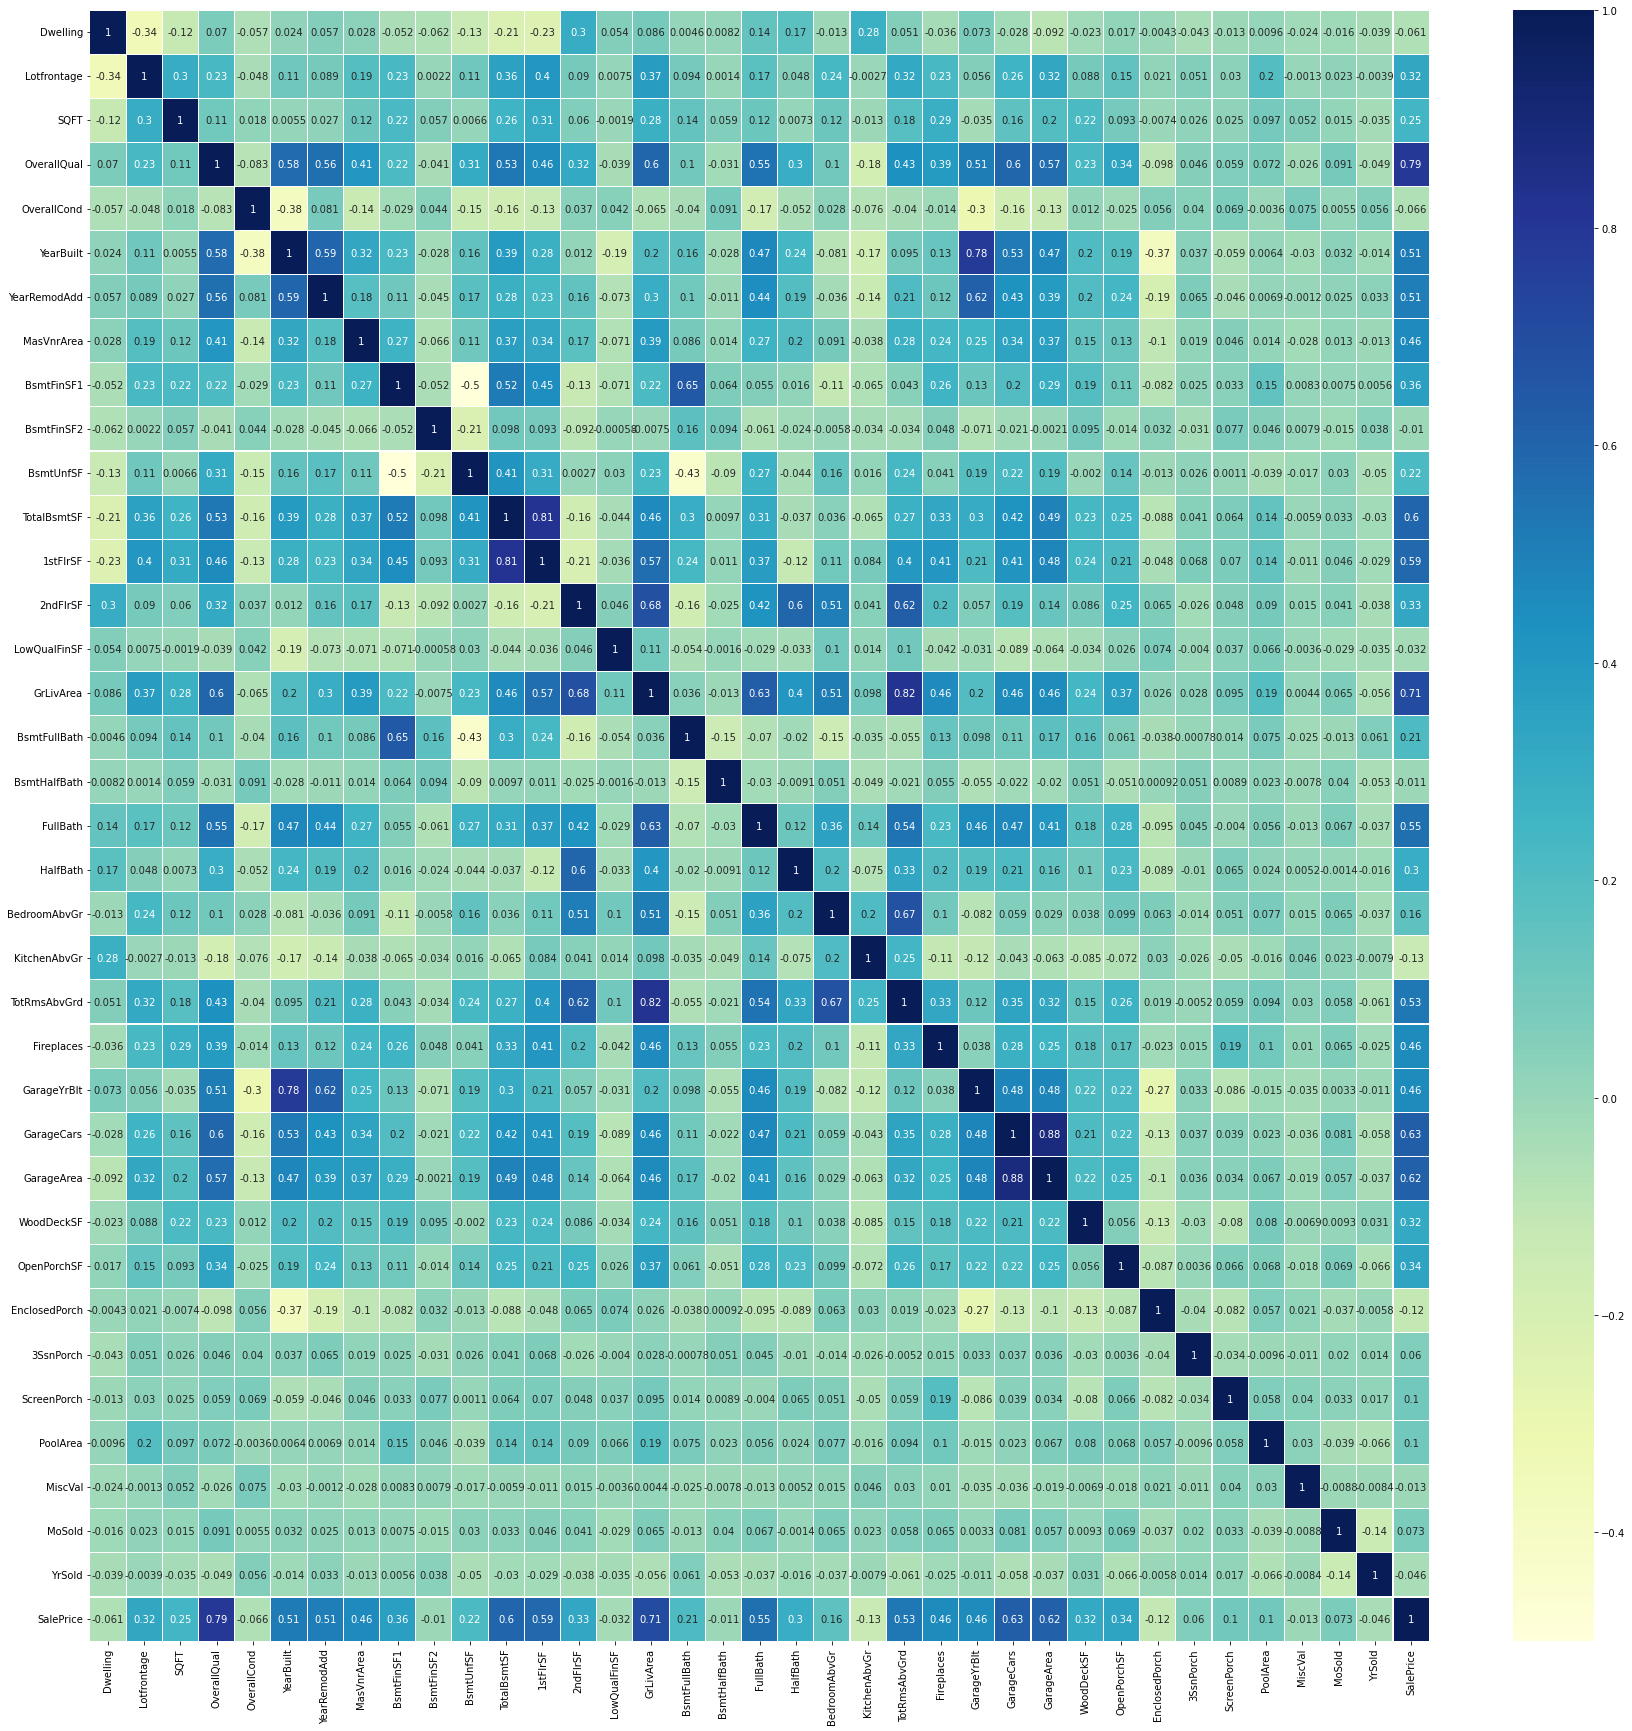

In [103]:
corrmat = numeric_df.corr()
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corrmat, annot=True, cmap="YlGnBu", linewidths=0.1, annot_kws={"fontsize":10});

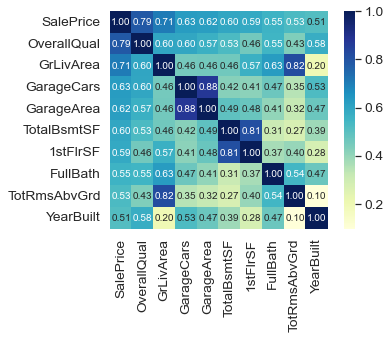

In [104]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(numeric_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap="YlGnBu", cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

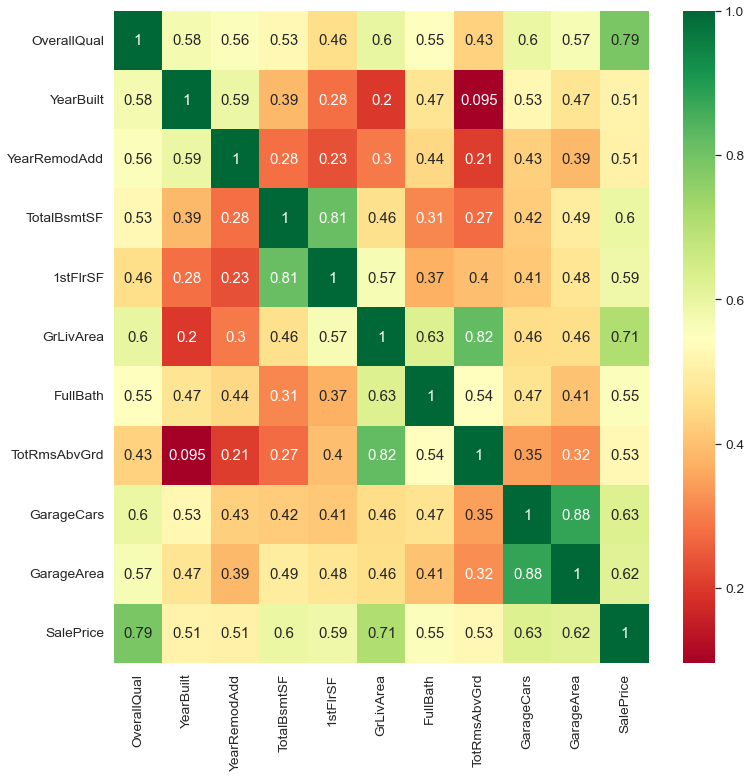

In [105]:
plt.figure(figsize=(12,12))
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

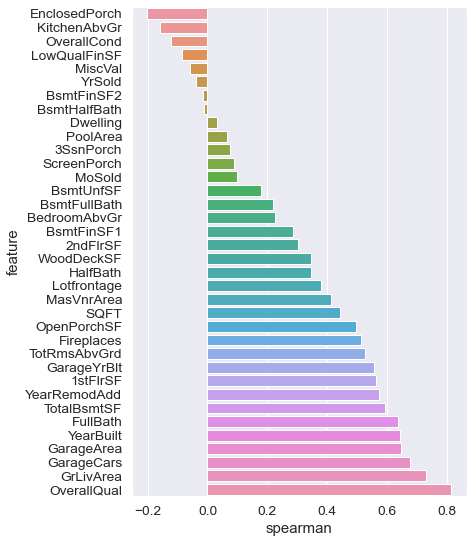

In [106]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')

features = corrmat[['SalePrice']].sort_values(['SalePrice'], ascending=False)
features = [f for f in features.index if f != 'SalePrice']

spearman(numeric_df, features)

df.drop(['LandSlope','BsmtFinType2','Dwelling','BsmtHalfBath'], axis = 1,inplace = True)
df.drop(['LandSlope','BsmtFinType2','Dwelling','BsmtHalfBath'], axis = 1,inplace = True)

In [107]:
df1.drop(['LandSlope','BsmtFinType2','Dwelling','BsmtHalfBath'], axis = 1,inplace = True)

In [108]:
dataset = df.replace({'MSSubClass': {20: 'SubClass_20', 30: 'SubClass_30',40: 'SubClass_40',
45: 'SubClass_45',50: 'SubClass_50',60: 'SubClass_60',70: 'SubClass_70',
75: 'SubClass_75',80: 'SubClass_80',85: 'SubClass_85',90: 'SubClass_90',
120: 'SubClass_120',150: 'SubClass_150',160: 'SubClass_160',180: 'SubClass_180',
190: 'SubClass_190'}})

dataset1 = df1.replace({'MSSubClass': {20: 'SubClass_20', 30: 'SubClass_30',40: 'SubClass_40',
45: 'SubClass_45',50: 'SubClass_50',60: 'SubClass_60',70: 'SubClass_70',
75: 'SubClass_75',80: 'SubClass_80',85: 'SubClass_85',90: 'SubClass_90',
120: 'SubClass_120',150: 'SubClass_150',160: 'SubClass_160',180: 'SubClass_180',
190: 'SubClass_190'}})

In [109]:
df = df.replace({'MoSold': {1: 'Jan', 2: 'Feb',3: 'Mar',
4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct',
11: 'Nov',12: 'Dec'}})

df1 = df1.replace({'MoSold': {1: 'Jan', 2: 'Feb',3: 'Mar',
4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct',
11: 'Nov',12: 'Dec'}})

In [110]:
df['YrSold'] = df['YrSold'].astype(str)
df1['YrSold'] = df1['YrSold'].astype(str)

In [111]:
df.dtypes

Dwelling           int64
Zone              object
Lotfrontage      float64
SQFT               int64
Street            object
                  ...   
MoSold            object
YrSold            object
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 77, dtype: object

In [112]:
df.head()

,Dwelling,Zone,Lotfrontage,SQFT,Street,LotShape,Flatness,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,70.98847,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,MnPrv,0,Feb,2007,WD,Normal,128000
1,20,RL,95.00000,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,MnPrv,0,Oct,2007,WD,Normal,268000
2,60,RL,92.00000,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,MnPrv,0,Jun,2007,WD,Normal,269790
3,20,RL,105.00000,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,MnPrv,0,Jan,2010,COD,Normal,190000
4,20,RL,70.98847,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,MnPrv,0,Jun,2009,WD,Normal,215000


In [113]:
objList = df.select_dtypes(include = "object").columns
print (objList)

#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

Index(['Zone', 'Street', 'LotShape', 'Flatness', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Fence', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Dwelling       1168 non-null   int64  
 1   Zone           1168 non-null   int32  
 2   Lotfrontage    1168 non-null   float64
 3   SQFT           1168 non-null   

In [114]:
objList = df1.select_dtypes(include = "object").columns
print (objList)

#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df1[feat] = le.fit_transform(df1[feat].astype(str))

print (df1.info())

Index(['Zone', 'Street', 'LotShape', 'Flatness', 'Utilities', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Zone           292 non-null    int32  
 1   Lotfrontage    292 non-null    float64
 2   SQFT           292 non-null    int64  
 3   Street         292 non-null    int32  
 4   LotShape       292

In [115]:
df.head()

,Dwelling,Zone,Lotfrontage,SQFT,Street,LotShape,Flatness,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,70.98847,4928,1,0,3,0,4,0,13,2,2,4,2,6,5,1976,1976,1,1,8,9,2,0.0,3,4,1,2,3,3,0,120,5,0,958,1078,1,4,1,4,958,0,0,958,0,0,2,0,2,1,3,5,6,1,4,1,1977.0,2,2,440,4,4,2,0,205,0,0,0,0,2,0,3,1,8,4,128000
1,20,3,95.00000,15865,1,0,3,0,4,1,12,2,2,0,2,8,6,1970,1970,0,5,12,13,2,0.0,2,2,2,3,1,1,0,351,4,823,1043,2217,1,0,1,4,2217,0,0,2217,1,0,2,0,4,1,2,8,6,1,4,1,1970.0,3,2,621,4,4,2,81,207,0,0,224,0,2,0,10,1,8,4,268000
2,60,3,92.00000,9920,1,0,3,0,1,0,15,2,2,0,5,7,5,1996,1997,1,1,7,7,2,0.0,2,4,2,2,3,0,2,862,5,0,255,1117,1,0,1,4,1127,886,0,2013,1,0,2,1,3,1,3,8,6,1,4,1,1997.0,3,2,455,4,4,2,180,130,0,0,0,0,2,0,6,1,8,4,269790
3,20,3,105.00000,11751,1,0,3,0,4,0,14,2,2,0,2,6,6,1977,1977,3,1,8,9,1,480.0,3,4,1,2,3,3,1,705,5,0,1139,1844,1,0,1,4,1844,0,0,1844,0,0,2,0,3,1,3,7,6,1,4,1,1977.0,2,2,546,4,4,2,0,122,0,0,0,0,2,0,4,4,0,4,190000
4,20,3,70.98847,16635,1,0,3,0,2,0,14,2,2,0,2,6,7,1977,2000,1,1,4,4,3,126.0,2,4,1,2,3,3,0,1246,5,0,356,1602,1,2,1,4,1602,0,0,1602,0,1,2,0,3,1,2,8,6,1,4,1,1977.0,1,2,529,4,4,2,240,0,0,0,0,0,2,0,6,3,8,4,215000


In [116]:
df.shape

(1168, 77)

In [117]:
df1.shape

(292, 72)

In [118]:
df.skew()


Dwelling          1.422019
Zone             -1.796785
Lotfrontage       2.710383
SQFT             10.659285
Street          -17.021969
                   ...    
MoSold           -0.273215
YrSold            0.115765
SaleType         -3.660513
SaleCondition    -2.671829
SalePrice         1.953878
Length: 77, dtype: float64

In [119]:
from scipy.stats import boxcox

for col in df:
    if df[col].skew()>=2:
        df[col]=np.cbrt(df[col]) 
    if df[col].skew()<= -2:
        df[col]=np.power(df[col],2)
        
for col in df1:
    if df1[col].skew()>=2:
        df1[col]=np.cbrt(df1[col]) 
    if df1[col].skew()<= -2:
        df1[col]=np.power(df1[col],2)

In [120]:
df.skew()

Dwelling          1.422019
Zone             -1.796785
Lotfrontage       0.021331
SQFT              2.013013
Street          -17.021969
                   ...    
MoSold           -0.273215
YrSold            0.115765
SaleType         -2.772615
SaleCondition    -1.384455
SalePrice         1.953878
Length: 77, dtype: float64

In [121]:
df1.skew()

Zone              0.187174
Lotfrontage       0.466813
SQFT              2.879506
Street          -12.020386
LotShape         -0.639195
                   ...    
MiscVal           5.835941
MoSold           -0.181867
YrSold            0.018412
SaleType         -4.359193
SaleCondition     0.651039
Length: 72, dtype: float64

In [122]:
x =df.drop('SalePrice',axis=1)
y =df['SalePrice']

In [123]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [124]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,train_size = 0.7)

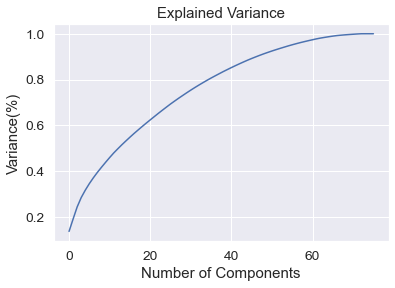

In [125]:
from sklearn.decomposition import PCA
pca = PCA()
PrincipalComponents = pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance(%)')
plt.title('Explained Variance')
plt.show()

In [126]:
pca = PCA(n_components = 60)
new_data = pca.fit_transform(x_scaled)
pri_x = pd.DataFrame(new_data)
pri_x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,-0.649603,-1.713697,-1.611688,0.762060,0.514987,-0.972134,0.643831,0.305040,0.233960,0.752346,-1.305240,0.019886,0.621712,-1.531987,1.375575,-0.300822,-0.651031,-0.181355,-0.143155,0.153532,2.005161,-1.262537,0.137883,-0.341324,-0.581180,-0.341831,-0.106498,0.015871,0.989697,0.013740,0.755116,0.708429,0.112607,1.525334,-0.194963,-0.387409,0.206610,0.409465,0.165891,0.491266,-0.225061,-0.909992,-0.294384,1.035256,0.840554,-0.576362,0.746942,0.054060,-0.341444,0.695957,-0.069762,1.452590,-0.947448,0.607199,-1.041281,0.141586,0.374174,0.254411,0.094917,-0.665295
1,3.013638,0.814244,5.281425,-0.841888,-0.570697,2.758815,-0.498108,3.606885,0.853237,3.390298,-1.168365,0.381859,0.417658,-0.574888,2.287487,-2.478557,-1.873190,0.010879,-2.313608,-0.231197,-1.609191,-2.465298,-1.106234,-3.986942,0.578375,-0.581465,0.178957,-0.770359,0.072275,-2.409077,-0.789216,-0.352563,-1.920289,-0.323680,0.856713,0.788098,0.856604,1.391066,0.982587,-0.315615,1.008368,-0.530460,-0.329291,0.162803,-0.346977,-1.329612,0.343705,0.209183,1.122447,-0.814648,-2.398270,0.589856,0.591759,0.516048,-0.479069,-0.814614,-0.300993,0.301930,-1.582497,-0.371484
2,2.983473,0.157126,0.527313,2.121369,-0.612264,0.716740,0.936179,-0.931875,0.720050,-1.144735,0.147361,0.551872,0.699789,-1.175108,-0.101426,-0.458657,-0.826083,0.163994,-0.553928,-0.602425,1.084530,-0.428114,0.478927,0.302167,0.344927,0.071128,-0.483199,-0.230162,-0.576685,0.303471,-0.101824,0.761577,0.204684,0.124564,0.430425,-0.618279,0.020072,-0.205052,-0.507449,-0.564358,0.694417,0.564333,-0.257944,0.157107,-0.598382,-0.243256,0.253749,0.595200,0.692180,-0.718548,-0.007164,0.221915,0.661671,0.010304,-0.916560,-0.885827,0.737565,-0.483479,-0.305524,0.210297
3,2.309205,-0.046312,1.959024,-1.590218,0.187259,-3.227529,0.736212,-0.468975,-0.793483,0.310645,-0.069324,0.371533,-0.562925,-0.038339,0.469016,0.345406,-0.445466,-0.895661,1.207921,0.406613,-0.332787,-1.075564,0.175032,-0.161855,-1.237174,-0.624247,1.062521,1.455715,-0.275408,-0.022632,-0.468534,-0.367450,0.289487,1.723980,-1.654264,-1.967113,1.024324,-0.550123,0.994242,-1.145112,-0.048514,-0.483715,0.486178,0.701765,0.063433,-1.527767,-0.508400,0.539195,0.267514,-0.291891,-0.184381,0.709748,-0.139114,0.016529,-0.932885,-0.262909,-0.188071,0.388020,-0.568916,0.104874
4,1.779941,-1.014332,2.752616,0.255256,0.496101,-0.775040,0.503586,-0.604828,0.527378,1.622653,1.669896,-0.200477,0.665800,-0.167705,-0.983794,-1.001428,-1.396018,0.605243,-0.515344,0.371907,0.527520,-0.819287,-0.414265,3.555161,-0.234631,0.683374,-0.244145,0.096989,0.468420,-0.246021,1.484547,-0.072957,-0.111469,1.525005,-0.227405,-1.053606,-0.559876,-1.403125,0.912363,1.088632,-0.808875,-0.236005,0.786745,-0.291301,0.960640,0.395447,-0.498592,-1.212854,0.512848,0.323570,-0.694957,-0.384964,0.040885,0.234773,0.615352,-0.981301,-0.236382,0.421062,0.303402,0.382728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,-3.341992,-1.309904,0.584235,-0.159648,-0.829265,-1.694556,0.146616,-0.790957,0.562916,-0.502516,0.800969,-0.511709,0.056167,0.762440,0.052713,0.334795,-1.049900,-0.955786,-0.586142,-0.220537,-0.486556,0.075199,-0.906041,-0.435531,-0.686507,-0.193152,0.729296,-0.779534,-0.704349,-0.760557,-0.190736,0.123049,1.038034,1.740134,-0.779480,0.781964,-1.342957,0.756370,1.005089,0.069469,0.438790,-0.806553,-0.710625,0.057504,-0.676423,0.241935,-0.246437,0.095633,0.779088,0.660825,-0.243921,0.592094,0.011390,-0.065397,-0.294853,0.416113,-0.288143,0.659779,0.228567,0.440924
1164,-2.070390,0.001863,-2.289459,-1.737602,-1.359463,1.236809,0.095948,0.302527,-0.609045,-0.893095,0.567799,-0.693092,-0.405461,-0.043995,-0.477449,0

In [128]:
x_train,x_test,y_train,y_test = train_test_split(pri_x,y,train_size = 0.7)

In [129]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((817, 60), (351, 60), (817,), (351,))

In [130]:
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(pri_x,y,test_size=0.20,random_state=i)
    ln=LinearRegression()
    ln.fit(x_train,y_train)
    if round(ln.score(x_train,y_train)*100,2)==round(ln.score(x_test,y_test)*100,2):
        print('At random state',i,'score is best')
        print('Train score',ln.score(x_train,y_train)*100)
        print('Test Score',ln.score(x_test,y_test))

At random state 470 score is best
Train score 82.98010425596689
Test Score 0.829792907209526


In [131]:
ln=LinearRegression()
ln.fit(x_train,y_train)
pred=ln.predict(x_test)
print('Train Score',ln.score(x_train,y_train)*100)
print('Testing:-',ln.score(x_test,y_test)*100)
print('Error')
print('MAE',mean_absolute_error(y_test,pred))
print('MSE',mean_squared_error(y_test,pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
print('R2 Score',r2_score(y_test,pred)*100)

Train Score 84.00175854374811
Testing:- 75.95262938317595
Error
MAE 21303.652043389116
MSE 1560727907.3850265
RMSE 39506.04899740072
R2 Score 75.95262938317595


In [132]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score


In [133]:
dtr=DecisionTreeRegressor()
svr=SVR()
svrl=SVR(kernel='linear')
kn=KNeighborsRegressor(n_neighbors=5)

In [134]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('TRAINING:-',f.score(x_train,y_train)*100)
    print('Testing:-',f.score(x_test,y_test)*100)
    print('MAE',mean_absolute_error(y_test,pred))
    print('MSE',mean_squared_error(y_test,pred))
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('R2 Score',r2_score(y_test,pred)*100)

In [135]:
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
print("DecisionTreeRegressor")
print('Training Score:-',dtr.score(x_train,y_train)*100)
print('Testing:-',dtr.score(x_test,y_test)*100)
print('MAE',mean_absolute_error(y_test,preddtr))
print('MSE',mean_squared_error(y_test,preddtr))
print('RMSE',np.sqrt(mean_squared_error(y_test,preddtr)))
print('R2 Score',r2_score(y_test,preddtr)*100)

DecisionTreeRegressor
Training Score:- 100.0
Testing:- 60.80178872236244
MAE 27941.923076923078
MSE 2544051207.7350426
RMSE 50438.58847881295
R2 Score 60.80178872236244


In [136]:
dtr_pred = dtr.predict(x_test)
dtr_pred= dtr_pred.reshape(-1,1)

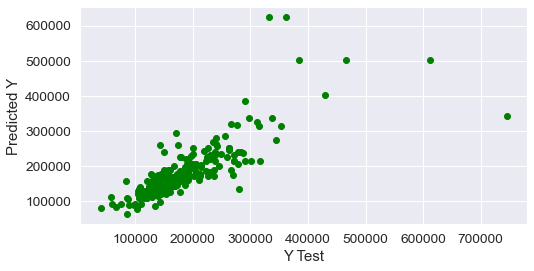

In [137]:
plt.figure(figsize=(8,4))
plt.scatter(y_test,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()


In [138]:
fun(svr)

TRAINING:- -5.187085944394099
Testing:- -6.197202832138715
MAE 53093.55953675181
MSE 6892434968.769032
RMSE 83020.69000417324
R2 Score -6.197202832138715


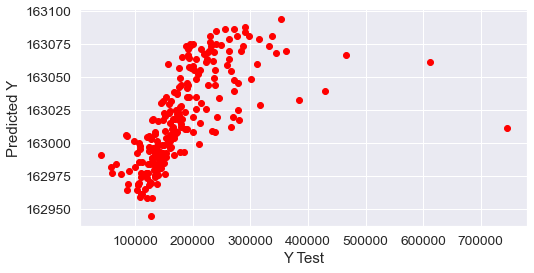

In [139]:
svr_pred = svr.predict(x_test)
svr_pred= svr_pred.reshape(-1,1)
plt.figure(figsize=(8,4))
plt.scatter(y_test,svr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [140]:
fun(kn)

TRAINING:- 84.41119213505665
Testing:- 74.86718356083801
MAE 22758.811111111114
MSE 1631175758.5813677
RMSE 40387.81695736188
R2 Score 74.86718356083801


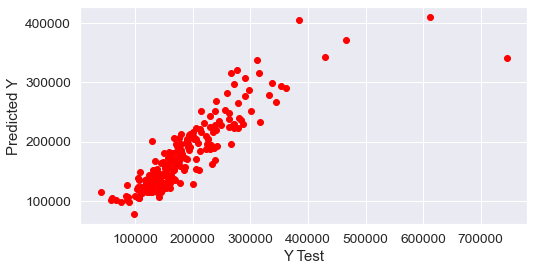

In [141]:
kn_pred = kn.predict(x_test)
plt.figure(figsize=(8,4))
plt.scatter(y_test,kn_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [142]:
from sklearn.ensemble import RandomForestRegressor
rd=RandomForestRegressor()
fun(rd)

TRAINING:- 97.23314274270004
Testing:- 87.20462116803657
MAE 18248.37606837607
MSE 830448581.960035
RMSE 28817.504783725377
R2 Score 87.20462116803657


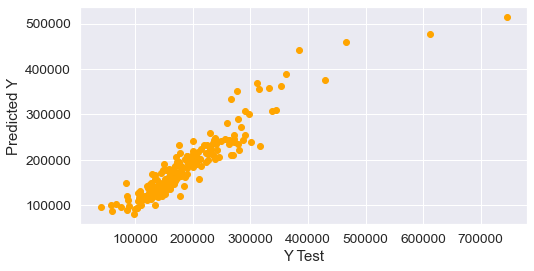

In [143]:
rd_pred= rd.predict(x_test)
rd_pred = rd_pred.reshape(-1,1)
plt.figure(figsize=(8,4))
plt.scatter(y_test,rd_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [144]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
fun(ad)

TRAINING:- 86.46538749565251
Testing:- 79.82133166320754
MAE 23485.767394570827
MSE 1309640513.6728384
RMSE 36188.9556864085
R2 Score 79.82133166320754


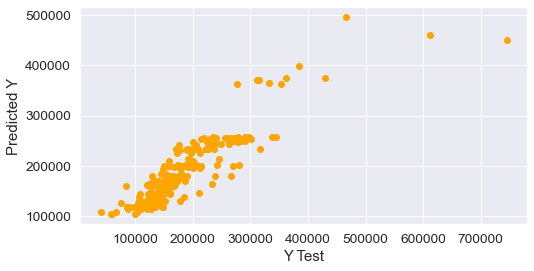

In [145]:
ad_pred= ad.predict(x_test)
ad_pred = ad_pred.reshape(-1,1)
plt.figure(figsize=(8,4))
plt.scatter(y_test,ad_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [146]:
from sklearn.ensemble import GradientBoostingRegressor
gd=GradientBoostingRegressor()
fun(gd)

TRAINING:- 97.4186632234148
Testing:- 88.5427447007989
MAE 16897.807750544463
MSE 743601384.6348649
RMSE 27269.055440826418
R2 Score 88.5427447007989


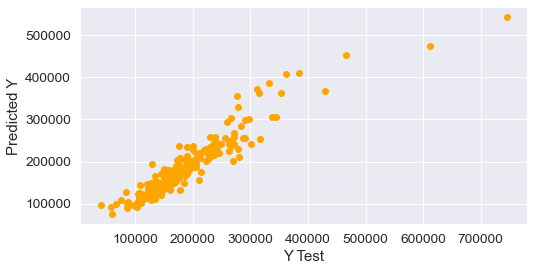

In [147]:
gd_pred= gd.predict(x_test)
gd_pred = gd_pred.reshape(-1,1)
plt.figure(figsize=(8,4))
plt.scatter(y_test,gd_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [148]:
from sklearn.model_selection import GridSearchCV

In [149]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [150]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rd,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [151]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [152]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': True}  



In [153]:
randmf = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, 
                               min_samples_leaf= 1, max_features = 'auto', max_depth= 90, 
                               bootstrap=True) 
randmf.fit( x_train, y_train) 


RandomForestRegressor(max_depth=90)

In [154]:
fun(randmf)

TRAINING:- 97.56085577805447
Testing:- 86.53651492892712
MAE 18442.309957264955
MSE 873810164.7746918
RMSE 29560.28018768922
R2 Score 86.53651492892712


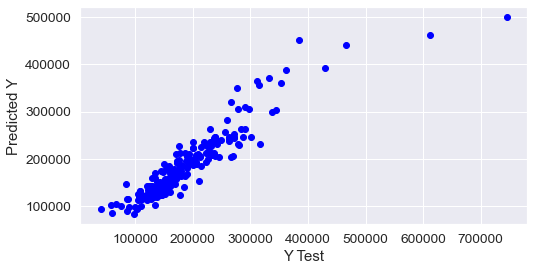

In [155]:
randmf_pred= randmf.predict(x_test)
randmf_pred = randmf_pred.reshape(-1,1)
plt.figure(figsize=(8,4))
plt.scatter(y_test,randmf_pred, c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [156]:
n_estimators = [20,50,100,600] # number of trees in the random forest
learning_rate = [.001,0.01,.1]
max_depth = [1,2,4,5,10] # maximum number of levels allowed in each decision tree
min_samples_split = [10,50,100,500] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
random_state = [1] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'learning_rate' : learning_rate,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'random_state': random_state}

In [157]:
GBR = RandomizedSearchCV(estimator = gd,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [158]:
GBR.fit(x_scaled,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  6.1min finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [1, 2, 4, 5, 10],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [10, 50, 100, 500],
                                        'n_estimators': [20, 50, 100, 600],
                                        'random_state': [1]},
                   random_state=35, verbose=2)

In [159]:
GBR.best_params_

{'random_state': 1,
 'n_estimators': 600,
 'min_samples_split': 50,
 'min_samples_leaf': 1,
 'max_depth': 2,
 'learning_rate': 0.1}

In [163]:
GD1 = GradientBoostingRegressor(n_estimators = 600, min_samples_split = 50, 
                               min_samples_leaf= 1,max_depth = 2, learning_rate = 0.1) 
GD1.fit(x_train, y_train) 

GradientBoostingRegressor(max_depth=2, min_samples_split=50, n_estimators=600)

In [164]:
fun(GD1)

TRAINING:- 98.95581961401709
Testing:- 86.68082538463312
MAE 18724.22470395746
MSE 864444094.8148336
RMSE 29401.430149141277
R2 Score 86.68082538463312


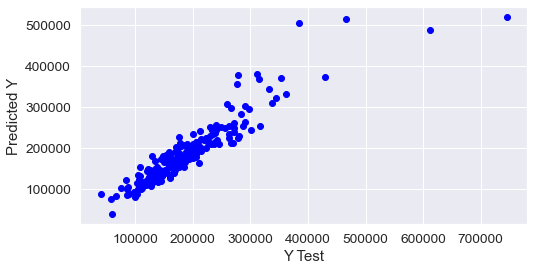

In [165]:
gd1_pred= GD1.predict(x_test)
gd1_pred = gd1_pred.reshape(-1,1)
plt.figure(figsize=(8,4))
plt.scatter(y_test,gd1_pred, c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [166]:
from sklearn.model_selection import cross_val_score

In [167]:
score=cross_val_score(svr,x_scaled,y,cv=5)
print("score of cross validation score for svr", score.mean()*100)
score=cross_val_score(dtr,x_scaled,y,cv=5)
print("score of cross validation score for dtr",score.mean()*100)
score=cross_val_score(rd,x_scaled,y,cv=5)
print("score of cross validation score for rd",score.mean()*100)
score=cross_val_score(gd,x_scaled,y,cv=5)
print("score of cross validation score for Gd",score.mean()*100)
score=cross_val_score(ad,x_scaled,y,cv=4)
print("score of cross validation score for ad",score.mean()*100)
score=cross_val_score(randmf,x_scaled,y,cv=4)
print('score of cross validation score for rd hyper',score.mean()*100)
score=cross_val_score(GD1,x_scaled,y,cv=4)
print('score of cross validation score for gd hyper',score.mean()*100)

score of cross validation score for svr -6.185555083224847
score of cross validation score for dtr 72.23397581487718
score of cross validation score for rd 84.74451322778953
score of cross validation score for Gd 87.03714828894078
score of cross validation score for ad 79.25596157914052
score of cross validation score for rd hyper 84.04397243892042
score of cross validation score for gd hyper 83.63411714321975


In [169]:
import pickle
filename='house_price_aus.pkl'
pickle.dump(gd,open(filename,'wb'))

     Actual        Predict
400  163000  164489.515385
231   89500   96146.221642
530  316600  253174.012648
214  171000  154339.052553
730  239799  233548.076464
..      ...            ...
295  150000  181796.095357
177  102776   91286.300130
606  165500  159498.578837
695  190000  171003.508683
867  160000  142307.074244

[234 rows x 2 columns]


Text(0.5, 1.0, 'Regressor Line')

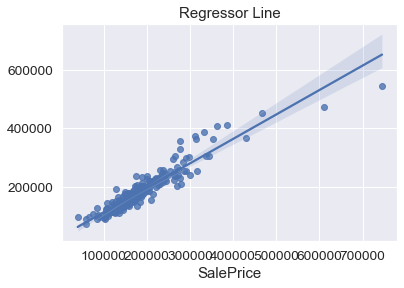

In [171]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=gd_pred

res

print(res)
sns.regplot(y_test,gd_pred)
plt.title('Regressor Line')